##Geospatial Analysis of Air Pollution Data##

Project Overview:

The project involves the analysis and visualization of air pollution data at various geographic levels, including global countries, USA states, and USA counties. Geopandas, a Python library for working with geospatial data, is used for data manipulation, visualization, and mapping. The project spans a range of years, from 2019 to 2022, to assess trends and variations in air quality.

The Air Quality Index (AQI) is a standardized and accessible method used by government agencies to convey the quality of the air to the general public. It quantifies air quality by measuring the concentration of common pollutants, such as particulate matter (PM2.5 and PM10), ground-level ozone (O3), nitrogen dioxide (NO2), sulfur dioxide (SO2), and carbon monoxide (CO). The AQI translates these pollutant concentrations into a numerical value and color-coded categories, ranging from "Good" to "Hazardous.

Data sources:
Air quality data
Country Level
[Air Quality Index- World Pollution Dataset](https://www.kaggle.com/datasets/hasibalmuzdadid/global-air-pollution-dataset)

USA states and counties Level
[Air Quality Index- USA pollution Dataset 2019-22](https://aqs.epa.gov/aqsweb/airdata/download_files.html)

Geography data and Boundary data
[World Countries](https://datahub.io/core/geo-countries#resource-geo-countries_zip)
[USA States Dataset ](https://datahub.io/core/geo-countries#resource-geo-countries_zip)
[USA Counties dataset ](https://public.opendatasoft.com/explore/dataset/us-county-boundaries/export/?disjunctive.statefp&disjunctive.countyfp&disjunctive.name&disjunctive.namelsad&disjunctive.stusab&disjunctive.state_name)



The Air Quality Index (AQI) typically ranges from 0 to 500, with lower values indicating better air quality and higher values indicating worse air quality. Here's a breakdown of the AQI scale and how to differentiate between good and the worst AQI:

```
0-50,Good
51-100,Moderate
101-150,Unhealthy for Sensitive Groups
151-200,Unhealthy
201-300,Very unhealthy
301-500,Hazardous/Worst
```


The project leverages Geopandas for creating visualizations, including choropleth maps, box plots, and bar plots, to represent air quality across different geographic regions. We begin our project as:


#Installation of packages and all required libraries

In [8]:
pip install geopandas

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Importing all datasets

In [10]:
#world countries dataset and global pollution dataset
df_world = gpd.read_file('/Users/binitashrestha/Desktop/Geospatial Analysis of Air Pollution Data/Data/countries.geo.json')
df_pollution = pd.read_csv('/Users/binitashrestha/Desktop/Geospatial Analysis of Air Pollution Data/Data/global air pollution dataset.csv')

#Datasets for USA Counties and Polltuion dataset from 2019-2022
df_uscounty_boundary = gpd.read_file('/Users/binitashrestha/Desktop/Geospatial Analysis of Air Pollution Data/Data/us-county-boundaries (1).geojson')
df_usstates = gpd.read_file('/Users/binitashrestha/Desktop/Geospatial Analysis of Air Pollution Data/Data/us-states.json')
df_pollution_2022 = pd.read_csv('/Users/binitashrestha/Desktop/Geospatial Analysis of Air Pollution Data/Data/annual_aqi_by_county_2022.csv')
df_pollution_2021 = pd.read_csv('/Users/binitashrestha/Desktop/Geospatial Analysis of Air Pollution Data/Data/annual_aqi_by_county_2021.csv')
df_pollution_2020 = pd.read_csv('/Users/binitashrestha/Desktop/Geospatial Analysis of Air Pollution Data/Data/annual_aqi_by_county_2020.csv')
df_pollution_2019 = pd.read_csv('/Users/binitashrestha/Desktop/Geospatial Analysis of Air Pollution Data/Data/annual_aqi_by_county_2019.csv')

In [11]:
df_world.head()

id                  name  \
0  AFG           Afghanistan   
1  AGO                Angola   
2  ALB               Albania   
3  ARE  United Arab Emirates   
4  ARG             Argentina   

                                            geometry  
0  POLYGON ((61.21082 35.65007, 62.23065 35.27066...  
1  MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6...  
2  POLYGON ((20.59025 41.85540, 20.46317 41.51509...  
3  POLYGON ((51.57952 24.24550, 51.75744 24.29407...  
4  MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...

In [12]:
df_pollution.head()

Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2               Italy   Priolo Gargallo         66     Moderate             1   
3              Poland         Przasnysz         34         Good             1   
4              France          Punaauia         22         Good             0   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good               39               Good              2   
3            Good               34               Good              0   
4            Good               22               Good              0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  
0             Good               51           Moderate  
1             Good               41               Good  
2             Good               66           Moderate  
3             Good               20               Good  
4             Good                6               Good

In [13]:
df_usstates.head()

id        name                                           geometry
0  AL     Alabama  POLYGON ((-87.35930 35.00118, -85.60667 34.984...
1  AK      Alaska  MULTIPOLYGON (((-131.60202 55.11798, -131.5691...
2  AZ     Arizona  POLYGON ((-109.04250 37.00026, -109.04798 31.3...
3  AR    Arkansas  POLYGON ((-94.47384 36.50186, -90.15254 36.496...
4  CA  California  POLYGON ((-123.23326 42.00619, -122.37885 42.0...

In [14]:
df_uscounty_boundary.head()

geo_point_2d statefp countyfp  countyns  \
0   {'lon': -83.6665354077, 'lat': 41.001938375}      39      063  01074044   
1  {'lon': -77.4574003866, 'lat': 38.4207190191}      51      179  01480173   
2  {'lon': -98.4999473753, 'lat': 40.1764332141}      31      181  00835912   
3   {'lon': -99.756726125, 'lat': 28.4225359982}      48      127  01383849   
4  {'lon': -91.1324230468, 'lat': 41.7723266607}      19      031  00465205   

   geoid      name         namelsad stusab lsad classfp  ... cbsafp metdivfp  \
0  39063   Hancock   Hancock County     OH   06      H1  ...  22300     None   
1  51179  Stafford  Stafford County     VA   06      H1  ...  47900    47894   
2  31181   Webster   Webster County     NE   06      H1  ...   None     None   
3  48127    Dimmit    Dimmit County     TX   06      H1  ...   None     None   
4  19031     Cedar     Cedar County     IA   06      H1  ...   None     None   

  funcstat       aland    awater     intptlat      intptlon state_name  \
0        A  1376125660   6020647  +41.0004711  -083.6660335       Ohio   
1        A   697237202  28088011  +38.4132608  -077.4513342   Virginia   
2        A  1489017962    337241  +40.1806461  -098.4985897   Nebraska   
3        A  3441795367  14576535  +28.4235871  -099.7658713      Texas   
4        A  1500798712   6385832  +41.7723600  -091.1326105       Iowa   

  countyfp_nozero                                           geometry  
0              63  POLYGON ((-83.88076 41.08036, -83.88076 41.081...  
1             179  POLYGON ((-77.58878 38.50404, -77.58295 38.508...  
2             181  POLYGON ((-98.72662 40.29186, -98.72663 40.292...  
3             127  POLYGON ((-99.78085 28.64383, -99.78079 28.643...  
4              31  POLYGON ((-91.36608 41.86007, -91.36620 41.860...  

[5 rows x 22 columns]

In [15]:
df_pollution_2022.head()

State   County  Year  Days with AQI  Good Days  Moderate Days  \
0  Alabama  Baldwin  2022            141        119             22   
1  Alabama     Clay  2022             58         50              8   
2  Alabama   DeKalb  2022            242        225             17   
3  Alabama   Elmore  2022            117        110              7   
4  Alabama   Etowah  2022            179        140             39   

   Unhealthy for Sensitive Groups Days  Unhealthy Days  Very Unhealthy Days  \
0                                    0               0                    0   
1                                    0               0                    0   
2                                    0               0                    0   
3                                    0               0                    0   
4                                    0               0                    0   

   Hazardous Days  Max AQI  90th Percentile AQI  Median AQI  Days CO  \
0               0       96                   52          40        0   
1               0       64                   52          27        0   
2               0       97                   48          37        0   
3               0       67                   47          37        0   
4               0       93                   58          42        0   

   Days NO2  Days Ozone  Days PM2.5  Days PM10  
0         0         114          27          0  
1         0           0          58          0  
2         0         224          18          0  
3         0         117           0          0  
4         0          76         103          0

In [16]:
df_pollution_2021.head()

State   County  Year  Days with AQI  Good Days  Moderate Days  \
0  Alabama  Baldwin  2021            280        264             16   
1  Alabama     Clay  2021            110        101              9   
2  Alabama   DeKalb  2021            361        331             30   
3  Alabama   Elmore  2021            241        238              3   
4  Alabama   Etowah  2021            286        253             33   

   Unhealthy for Sensitive Groups Days  Unhealthy Days  Very Unhealthy Days  \
0                                    0               0                    0   
1                                    0               0                    0   
2                                    0               0                    0   
3                                    0               0                    0   
4                                    0               0                    0   

   Hazardous Days  Max AQI  90th Percentile AQI  Median AQI  Days CO  \
0               0       61                   48          35        0   
1               0       67                   47          27        0   
2               0       84                   49          36        0   
3               0       87                   44          32        0   
4               0       77                   51          36        0   

   Days NO2  Days Ozone  Days PM2.5  Days PM10  
0         0         221          59          0  
1         0           0         110          0  
2         0         320          41          0  
3         0         241           0          0  
4         0         213          73          0

In [17]:
df_pollution_2020.head()

State   County  Year  Days with AQI  Good Days  Moderate Days  \
0  Alabama  Baldwin  2020            269        250             19   
1  Alabama     Clay  2020            108         99              9   
2  Alabama   DeKalb  2020            364        350             14   
3  Alabama   Elmore  2020            197        197              0   
4  Alabama   Etowah  2020            278        260             18   

   Unhealthy for Sensitive Groups Days  Unhealthy Days  Very Unhealthy Days  \
0                                    0               0                    0   
1                                    0               0                    0   
2                                    0               0                    0   
3                                    0               0                    0   
4                                    0               0                    0   

   Hazardous Days  Max AQI  90th Percentile AQI  Median AQI  Days CO  \
0               0       74                   49          36        0   
1               0       86                   49          26        0   
2               0       90                   45          36        0   
3               0       47                   41          31        0   
4               0       92                   46          34        0   

   Days NO2  Days Ozone  Days PM2.5  Days PM10  
0         0         198          71          0  
1         0           0         108          0  
2         0         331          33          0  
3         0         197           0          0  
4         0         204          74          0

In [18]:
df_pollution_2019.head()

State   County  Year  Days with AQI  Good Days  Moderate Days  \
0  Alabama  Baldwin  2019            271        237             34   
1  Alabama     Clay  2019            107         97             10   
2  Alabama  Colbert  2019            263        252             11   
3  Alabama   DeKalb  2019            361        324             37   
4  Alabama   Elmore  2019            228        208             20   

   Unhealthy for Sensitive Groups Days  Unhealthy Days  Very Unhealthy Days  \
0                                    0               0                    0   
1                                    0               0                    0   
2                                    0               0                    0   
3                                    0               0                    0   
4                                    0               0                    0   

   Hazardous Days  Max AQI  90th Percentile AQI  Median AQI  Days CO  \
0               0       80                   52          37        0   
1               0       67                   50          30        0   
2               0       61                   47          37        0   
3               0       90                   51          39        0   
4               0      100                   50          39        0   

   Days NO2  Days Ozone  Days PM2.5  Days PM10  
0         0         220          51          0  
1         0           0         107          0  
2         0         228          35          0  
3         0         331          30          0  
4         0         228           0          0

##EDA AND DATA PRE-PROCESSING##

**RENAMING COUNTRIES', STATES AND COUNTIES'S NAMES**

In [19]:
#rename name column to Country, State and County
df_world.rename(columns={"name": "Country"}, inplace=True)
df_usstates.rename(columns={"name": "State"}, inplace=True)
df_uscounty_boundary.rename(columns={"name": "County"}, inplace=True)

In [20]:
df_pollution.Country.unique()

array(['Russian Federation', 'Brazil', 'Italy', 'Poland', 'France',
       'United States of America', 'Germany', 'Belgium', 'Egypt', 'China',
       'Netherlands', 'India', 'Pakistan', 'Republic of North Macedonia',
       'Colombia', 'Romania', 'Indonesia', 'Finland', 'South Africa',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'Haiti', 'Somalia', 'Philippines',
       'Latvia', 'Chad', 'New Zealand', 'Tunisia', 'Viet Nam',
       'Iran (Islamic Republic of)', 'Mexico', 'Japan', 'El Salvador',
       'Bulgaria', 'Nigeria', 'South Sudan', 'Guatemala', 'Ireland',
       'Turkey', 'Peru', 'Democratic Republic of the Congo', 'Canada',
       'Switzerland', 'Denmark', 'Cameroon', 'Australia', 'Portugal',
       "Côte d'Ivoire", 'Sweden', 'Ethiopia', 'Thailand', 'Hungary',
       'Kazakhstan', 'Israel', 'Spain', 'Myanmar', 'Papua New Guinea',
       'Madagascar', 'Lithuania', 'Ghana', 'Azerbaijan', 'Armenia',
       'Ukraine', 'Malays

In [21]:
#replacing countries names to make it uniform for both datasets: df_pollution and df_world
df_pollution['Country'] = df_pollution['Country'].replace('Russian Federation', 'Russia')
df_pollution['Country'] = df_pollution['Country'].replace('United States of America', 'USA')
df_pollution['Country'] = df_pollution['Country'].replace('United Kingdom of Great Britain and Northern Ireland', 'UK')
df_pollution['Country'] = df_pollution['Country'].replace('United Republic of Tanzania', 'Tanzania')
df_pollution['Country'] = df_pollution['Country'].replace('Iran (Islamic Republic of)', 'Iran')
df_pollution['Country'] = df_pollution['Country'].replace('Republic of North Macedonia', 'Macedonia')
df_pollution['Country'] = df_pollution['Country'].replace('Democratic Republic of the Congo', 'Congo')
df_pollution['Country'] = df_pollution['Country'].replace('Bolivia (Plurinational State of)', 'Bolivia')
df_pollution['Country'] = df_pollution['Country'].replace('United Arab Emirates', 'UAE')
df_pollution['Country'] = df_pollution['Country'].replace('Venezuela (Bolivarian Republic of)', 'Venezuela')
df_pollution['Country'] = df_pollution['Country'].replace('Republic of Moldova', 'Moldova')
df_pollution['Country'] = df_pollution['Country'].replace('Kingdom of Eswatini', 'Eswatini')
df_pollution['Country'] = df_pollution['Country'].replace('Central African Republic', 'Central Africa')
df_pollution['Country'] = df_pollution['Country'].replace('Republic of Korea', 'Korea')
df_pollution['Country'] = df_pollution['Country'].replace('State of Palestine', 'Palestine')
df_pollution['Country'] = df_pollution['Country'].replace('Syrian Arab Republic', 'Syria')

df_world['Country'] = df_world['Country'].replace('United States of America', 'USA')
df_world['Country'] = df_world['Country'].replace('United Kingdom of Great Britain and Northern Ireland', 'UK')

**CHECKING NULL VALUES AND DUBLICATES**

In [22]:
#checking for any null values for all dataframes
df_world.isna().sum()
df_pollution.isna().sum()
df_usstates.isna().sum()
df_uscounty_boundary.isna().sum()
df_uscounty_boundary=df_uscounty_boundary.fillna(1)
df_uscounty_boundary.isna().sum()

geo_point_2d       0
statefp            0
countyfp           0
countyns           0
geoid              0
County             0
namelsad           0
stusab             0
lsad               0
classfp            0
mtfcc              0
csafp              0
cbsafp             0
metdivfp           0
funcstat           0
aland              0
awater             0
intptlat           0
intptlon           0
state_name         0
countyfp_nozero    0
geometry           0
dtype: int64

*To remove any duplicated data and for cleaning them**

**FOR POLLUTION DATAFRAME 2019**

*We checked for the unique county names with the data frame for the year 2019 which provided us with the following output: (789,).As a one-dimensional array, the number of columns is 1. We checked with drop_duplicate and shape again which doesnot provided us an expected results*

In [23]:
df_pollution_2019.County.unique().shape

(789,)

In [24]:
df_pollution_2019= df_pollution_2019.drop_duplicates()
df_pollution_2019.shape

(1020, 18)

In [25]:
df_pollution_2019.groupby(["County"]).count()["State"]

County
Ada            1
Adair          1
Adams          5
Adjuntas       1
Aiken          1
              ..
Yavapai        1
Yellowstone    1
Yolo           1
York           3
Yuma           1
Name: State, Length: 789, dtype: int64

In [26]:
df_pollution_2019[df_pollution_2019["County"] == "Adams"]

State County  Year  Days with AQI  Good Days  Moderate Days  \
105      Colorado  Adams  2019            365        223            141   
239      Illinois  Adams  2019            241        208             33   
645          Ohio  Adams  2019            327        323              4   
731  Pennsylvania  Adams  2019            365        288             77   
930    Washington  Adams  2019            360        354              6   

     Unhealthy for Sensitive Groups Days  Unhealthy Days  Very Unhealthy Days  \
105                                    1               0                    0   
239                                    0               0                    0   
645                                    0               0                    0   
731                                    0               0                    0   
930                                    0               0                    0   

     Hazardous Days  Max AQI  90th Percentile AQI  Median AQI  Days CO  \
105               0      132                   64          47        0   
239               0       93                   54          41        0   
645               0       61                   38          21        0   
731               0       85                   59          42        0   
930               0       88                   31          13        0   

     Days NO2  Days Ozone  Days PM2.5  Days PM10  
105        48         150          87         80  
239         0         241           0          0  
645         0           0         327          0  
731         0         266          99          0  
930         0           0         360          0

In [27]:
df_pollution_2019[["State", "County"]].drop_duplicates().shape

(1020, 2)

*We checked by grouping the data by county and counts the number of unique states associated with each county.*

*df_pollution_2019[df_pollution_2019["County"] == "Adams"]: extracts and displays all the data related to the county named "Adams.This shows that the states have similar county names*

*We counted the number of unique combinations of "State" and "County" together in the DataFrame that shows (1020, 2)*

*The same process has been continued for the years: 2020,2021 and 2022*


**FOR POLLUTION DATAFRAME 2020**

In [28]:
df_pollution_2020.County.unique().shape

(778,)

In [29]:
df_pollution_2020[df_pollution_2020["County"] == "Adams"]

State County  Year  Days with AQI  Good Days  Moderate Days  \
101      Colorado  Adams  2020            366        222            132   
235      Illinois  Adams  2020            244        220             24   
633          Ohio  Adams  2020            287        268             19   
714  Pennsylvania  Adams  2020            366        320             46   
913    Washington  Adams  2020            364        354              2   

     Unhealthy for Sensitive Groups Days  Unhealthy Days  Very Unhealthy Days  \
101                                   11               1                    0   
235                                    0               0                    0   
633                                    0               0                    0   
714                                    0               0                    0   
913                                    0               6                    2   

     Hazardous Days  Max AQI  90th Percentile AQI  Median AQI  Days CO  \
101               0      151                   72          47        0   
235               0       84                   50          38        0   
633               0       81                   48          29        0   
714               0       86                   54          40        0   
913               0      241                   33          13        0   

     Days NO2  Days Ozone  Days PM2.5  Days PM10  
101        68         179          59         60  
235         0         244           0          0  
633         0           0         287          0  
714         0         282          84          0  
913         0           0         364          0

In [30]:
df_pollution_2020[["State", "County"]].drop_duplicates().shape

(1003, 2)

**FOR POLLUTION DATAFRAME 2021**

In [31]:
df_pollution_2021.County.unique().shape

(779,)

In [32]:
df_pollution_2021[df_pollution_2021["County"] == "Adams"]

State County  Year  Days with AQI  Good Days  Moderate Days  \
100      Colorado  Adams  2021            365        206            136   
232      Illinois  Adams  2021            242        219             23   
712  Pennsylvania  Adams  2021            364        263             98   
910    Washington  Adams  2021            364        340             17   

     Unhealthy for Sensitive Groups Days  Unhealthy Days  Very Unhealthy Days  \
100                                   22               1                    0   
232                                    0               0                    0   
712                                    3               0                    0   
910                                    3               4                    0   

     Hazardous Days  Max AQI  90th Percentile AQI  Median AQI  Days CO  \
100               0      151                   93          48        0   
232               0       93                   50          40        0   
712               0      129                   65          42        0   
910               0      180                   34          14        0   

     Days NO2  Days Ozone  Days PM2.5  Days PM10  
100        56         198          42         69  
232         0         242           0          0  
712         0         225         139          0  
910         0           0         364          0

In [33]:
df_pollution_2021[["State", "County"]].drop_duplicates().shape

(1002, 2)

**FOR POLLUTION DATAFRAME 2022**

In [34]:
df_pollution_2022.County.unique().shape

(755,)

In [35]:
df_pollution_2022[df_pollution_2022["County"] == "Adams"]

State County  Year  Days with AQI  Good Days  Moderate Days  \
93       Colorado  Adams  2022            281        148            119   
221      Illinois  Adams  2022            206        199              7   
684  Pennsylvania  Adams  2022            305        247             58   
875    Washington  Adams  2022            212        212              0   

     Unhealthy for Sensitive Groups Days  Unhealthy Days  Very Unhealthy Days  \
93                                    14               0                    0   
221                                    0               0                    0   
684                                    0               0                    0   
875                                    0               0                    0   

     Hazardous Days  Max AQI  90th Percentile AQI  Median AQI  Days CO  \
93                0      126                   90          50        0   
221               0       71                   48          39        0   
684               0       97                   55          41        7   
875               0       36                   18          11        0   

     Days NO2  Days Ozone  Days PM2.5  Days PM10  
93         37         192          18         34  
221         0         206           0          0  
684        55         166          77          0  
875         0           0         212          0

In [36]:
df_pollution_2022[["State", "County"]].drop_duplicates().shape

(966, 2)

**CONCATING ALL FOUR POLLUTION DATAFRAMES TOGETHER**

*Concating all four pollution datasets of 2019-2020-2021-2022 together as df_USA_Pol

*The new column "State_County" was created by combining the "State" and "County" columns, resulting in a unique identifier for each combination of state and county in the df_USA_Pol GeoDataFrame useful for data analysis*


In [37]:
#Concating all four datasets from 2019-2022 as df_USA_Pol
df_USA_Pol = gpd.GeoDataFrame(pd.concat([df_pollution_2019, df_pollution_2020, df_pollution_2021, df_pollution_2022], ignore_index=True))
df_USA_Pol

State      County  Year  Days with AQI  Good Days  Moderate Days  \
0     Alabama     Baldwin  2019            271        237             34   
1     Alabama        Clay  2019            107         97             10   
2     Alabama     Colbert  2019            263        252             11   
3     Alabama      DeKalb  2019            361        324             37   
4     Alabama      Elmore  2019            228        208             20   
...       ...         ...   ...            ...        ...            ...   
3986  Wyoming    Sublette  2022            243        208             34   
3987  Wyoming  Sweetwater  2022            212        176             35   
3988  Wyoming       Teton  2022            213        200             13   
3989  Wyoming       Uinta  2022            181        179              2   
3990  Wyoming      Weston  2022            181        179              2   

      Unhealthy for Sensitive Groups Days  Unhealthy Days  \
0                                       0               0   
1                                       0               0   
2                                       0               0   
3                                       0               0   
4                                       0               0   
...                                   ...             ...   
3986                                    1               0   
3987                                    0               1   
3988                                    0               0   
3989                                    0               0   
3990                                    0               0   

      Very Unhealthy Days  Hazardous Days  Max AQI  90th Percentile AQI  \
0                       0               0       80                   52   
1                       0               0       67                   50   
2                       0               0       61                   47   
3                       0               0       90                   51   
4                       0               0      100                   50   
...                   ...             ...      ...                  ...   
3986                    0               0      105                   54   
3987                    0               0      157                   57   
3988                    0               0      100                   48   
3989                    0               0       55                   17   
3990                    0               0       58                   44   

      Median AQI  Days CO  Days NO2  Days Ozone  Days PM2.5  Days PM10  
0             37        0         0         220          51          0  
1             30        0         0           0         107          0  
2             37        0         0         228          35          0  
3             39        0         0         331          30          0  
4             39        0         0         228           0          0  
...          ...      ...       ...         ...         ...        ...  
3986          46        0         0         242           1          0  
3987          43        0         0         152          31         29  
3988          44        1         1         209           2          0  
3989           6        0         0           0           0        181  
3990          40        0         0         181           0          0  

[3991 rows x 18 columns]

In [38]:
#creating new column State_County combining state and county
df_USA_Pol["State_County"] = df_USA_Pol["State"] + "_" + df_USA_Pol["County"]
df_USA_Pol

State      County  Year  Days with AQI  Good Days  Moderate Days  \
0     Alabama     Baldwin  2019            271        237             34   
1     Alabama        Clay  2019            107         97             10   
2     Alabama     Colbert  2019            263        252             11   
3     Alabama      DeKalb  2019            361        324             37   
4     Alabama      Elmore  2019            228        208             20   
...       ...         ...   ...            ...        ...            ...   
3986  Wyoming    Sublette  2022            243        208             34   
3987  Wyoming  Sweetwater  2022            212        176             35   
3988  Wyoming       Teton  2022            213        200             13   
3989  Wyoming       Uinta  2022            181        179              2   
3990  Wyoming      Weston  2022            181        179              2   

      Unhealthy for Sensitive Groups Days  Unhealthy Days  \
0                                       0               0   
1                                       0               0   
2                                       0               0   
3                                       0               0   
4                                       0               0   
...                                   ...             ...   
3986                                    1               0   
3987                                    0               1   
3988                                    0               0   
3989                                    0               0   
3990                                    0               0   

      Very Unhealthy Days  Hazardous Days  Max AQI  90th Percentile AQI  \
0                       0               0       80                   52   
1                       0               0       67                   50   
2                       0               0       61                   47   
3                       0               0       90                   51   
4                       0               0      100                   50   
...                   ...             ...      ...                  ...   
3986                    0               0      105                   54   
3987                    0               0      157                   57   
3988                    0               0      100                   48   
3989                    0               0       55                   17   
3990                    0               0       58                   44   

      Median AQI  Days CO  Days NO2  Days Ozone  Days PM2.5  Days PM10  \
0             37        0         0         220          51          0   
1             30        0         0           0         107          0   
2             37        0         0         228          35          0   
3             39        0         0         331          30          0   
4             39        0         0         228           0          0   
...          ...      ...       ...         ...         ...        ...   
3986          46        0         0         242           1          0   
3987          43        0         0         152          31         29   
3988          44        1         1         209           2          0   
3989           6        0         0           0           0        181   
3990          40        0         0         181           0          0   

            State_County  
0        Alabama_Baldwin  
1           Alabama_Clay  
2        Alabama_Colbert  
3         Alabama_DeKalb  
4         Alabama_Elmore  
...                  ...  
3986    Wyoming_Sublette  
3987  Wyoming_Sweetwater  
3988       Wyoming_Teton  
3989       Wyoming_Uinta  
3990      Wyoming_Weston  

[3991 rows x 19 columns]

#**I.FOR WORLD AIR POLLUTION DATA VISUALIZATION**

#Visualization 1: World AIR Pollution Index(AQI) by Countries

**FOR WORLD AIR POLLUTION DATA VISUALIZATION**

*Aggregate df_polution by country: The df_pollution data frame is aggregated by grouping it based on the "Country "column to calculate the median of the selected columns, including "AQI Value," "CO AQI Value," "Ozone AQI Value," "NO2 AQI Value," and "PM2.5 AQI Value" for each country. The resulting Data Frame, df_pollution_aggregated, contains the median values of these columns for each country. This aggregation can be useful for summarizing air quality data at a country level, making it easier to analyze and visualize trends or differences in air quality among different countries.*

*Merge both dataframes: The merge function in spatial analysis is used to merge different datasets or sources of data frames, we have merged df_pollution_aggregated  with df_world aligning rows based on the Country column to analyze relationship between air quality data and country-specific information.*

In [39]:
#aggregated pollution df by country
df_pollution_aggrgeated = df_pollution.groupby(["Country"])[["AQI Value", "CO AQI Value", "Ozone AQI Value", "NO2 AQI Value", "PM2.5 AQI Value"]].median()
df_pollution_aggrgeated

AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
Country                                                                
Afghanistan       87.0           1.0             41.0            0.0   
Albania           66.0           1.0             42.0            1.0   
Algeria           82.5           1.0             40.0            1.0   
Andorra           29.0           1.0             29.0            0.0   
Angola            58.0           1.0             21.0            0.0   
...                ...           ...              ...            ...   
Venezuela         60.0           1.0             16.0            3.0   
Viet Nam          69.0           2.0             32.0            1.0   
Yemen            151.0           1.0             44.0            1.0   
Zambia            36.5           1.0             20.0            0.0   
Zimbabwe          41.0           1.0             17.0            0.0   

             PM2.5 AQI Value  
Country                       
Afghanistan             87.0  
Albania                 66.0  
Algeria                 72.0  
Andorra                 22.0  
Angola                  58.0  
...                      ...  
Venezuela               60.0  
Viet Nam                69.0  
Yemen                  151.0  
Zambia                  36.5  
Zimbabwe                41.0  

[174 rows x 5 columns]

In [40]:
merged_countries = df_world.merge(df_pollution_aggrgeated, on='Country')
merged_countries

id       Country                                           geometry  \
0    AFG   Afghanistan  POLYGON ((61.21082 35.65007, 62.23065 35.27066...   
1    AGO        Angola  MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6...   
2    ALB       Albania  POLYGON ((20.59025 41.85540, 20.46317 41.51509...   
3    ARG     Argentina  MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...   
4    ARM       Armenia  POLYGON ((43.58275 41.09214, 44.97248 41.24813...   
..   ...           ...                                                ...   
141  VUT       Vanuatu  MULTIPOLYGON (((167.84488 -16.46633, 167.51518...   
142  YEM         Yemen  POLYGON ((53.10857 16.65105, 52.38521 16.38241...   
143  ZAF  South Africa  POLYGON ((31.52100 -29.25739, 31.32556 -29.401...   
144  ZMB        Zambia  POLYGON ((32.75937 -9.23060, 33.23139 -9.67672...   
145  ZWE      Zimbabwe  POLYGON ((31.19141 -22.25151, 30.65986 -22.151...   

     AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  PM2.5 AQI Value  
0         87.0           1.0             41.0            0.0             87.0  
1         58.0           1.0             21.0            0.0             58.0  
2         66.0           1.0             42.0            1.0             66.0  
3         22.0           0.0             15.0            0.5             20.0  
4         51.5           1.0             36.0            0.0             51.5  
..         ...           ...              ...            ...              ...  
141       30.0           0.0             25.0            0.0             30.0  
142      151.0           1.0             44.0            1.0            151.0  
143       91.5           3.0             17.0            4.0             91.5  
144       36.5           1.0             20.0            0.0             36.5  
145       41.0           1.0             17.0            0.0             41.0  

[146 rows x 8 columns]

*Plotting a world map with air pollution data: The visualization showed air pollution by country using the Air Quality Index (AQI) as the measure. We have used a colour scale from orange to red to represent AQI values ranging from 0 to 80. The code annotates the map with unique country names and provides labels for the x and y axes. The Air Quality Index is a standardized measure indicating overall air quality, and it considers various air pollutants like PM2.5, PM10, ozone, carbon monoxide, sulfur dioxide, and nitrogen dioxide.*

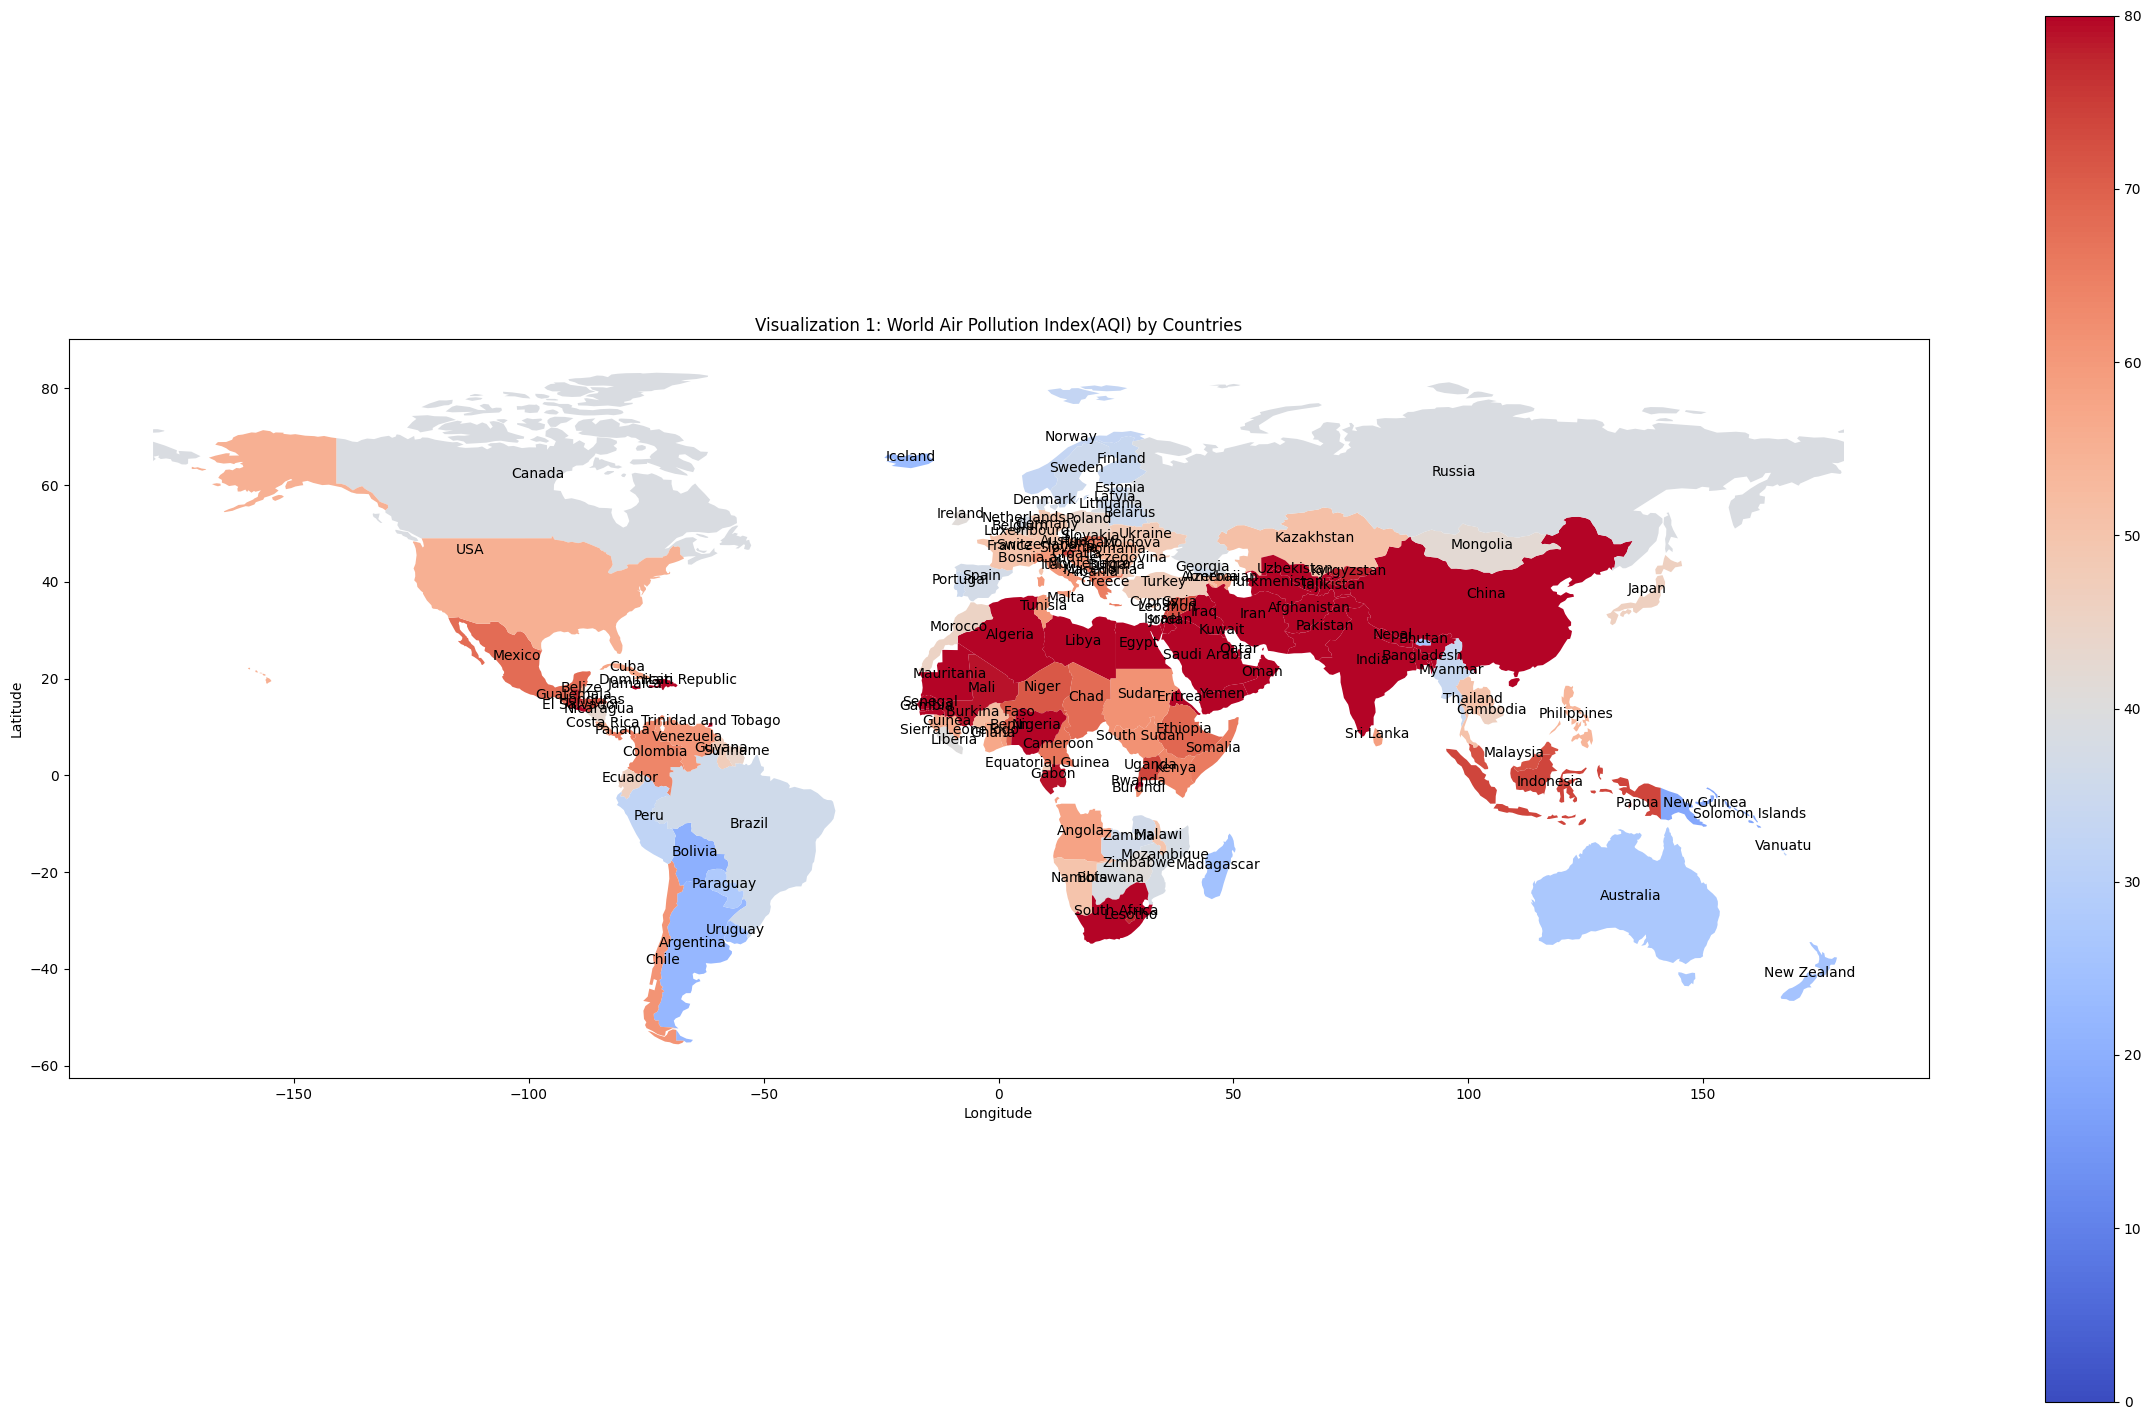

In [41]:
# plotting world map with countries air pollution and add labels max 80
vmin=0
vmax=80
fig, ax = plt.subplots(figsize=(30, 18))
merged_countries.plot(column="AQI Value", ax=ax, legend=True, cmap='coolwarm', vmin=vmin, vmax=vmax)

# annotating map with unique state names
unique_countries = merged_countries['Country'].unique()
for country_name in unique_countries:
    country_data = merged_countries[merged_countries['Country'] == country_name]
    centroid = country_data.unary_union.centroid
    ax.annotate(text=country_name, xy=(centroid.x, centroid.y), ha='center')

# Adding labels
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Visualization 1: World Air Pollution Index(AQI) by Countries")

# Showing the map
plt.show()

*The plot illustrates that regions in South Asia and North Africa face substantial challenges in terms of air quality, as reflected by their notably high Air Quality Index (AQI) values. The AQI scale is a recognized measure, ranging from 0 to 500, where lower values signify better air quality and higher values indicate poorer air quality.*

*For the purpose of visualization, the plot employs a scale of 0 to 80. This scale offers a clearer representation of air quality variations while preserving the context of the broader AQI scale.*

*The data underscores the pressing need for improved air quality, especially in South Asia and North Africa, due to their elevated AQI values, emphasizing the urgency of addressing air pollution for health and environmental concerns. On a positive note, continents like Australia and South America enjoy notably cleaner and healthier air, as indicated by their lower AQI values.*

*In summary, the findings emphasize the importance of addressing air quality challenges in regions with high AQI values, such as South Asia and North Africa, while acknowledging the comparatively better air quality in Australia and South America. This underscores the significance of air quality management and policy initiatives to protect public health and the environment.*

#Visualizations 2: Boxplots of World AQI Value and CO2

**BOXPLOTS OF AQI VALUE AND CO AQI VALUE**

*We created boxplots to visually represent the distribution and variations in AQI values across countries. Similarly it can be done for NO2, OZONE, PM2.5 and PM10.*

/var/folders/b4/pvyx0_kn49z728rc0h1kfgwm0000gn/T/ipykernel_12885/3901746662.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_pollution, x='Country', y='AQI Value', palette='coolwarm')


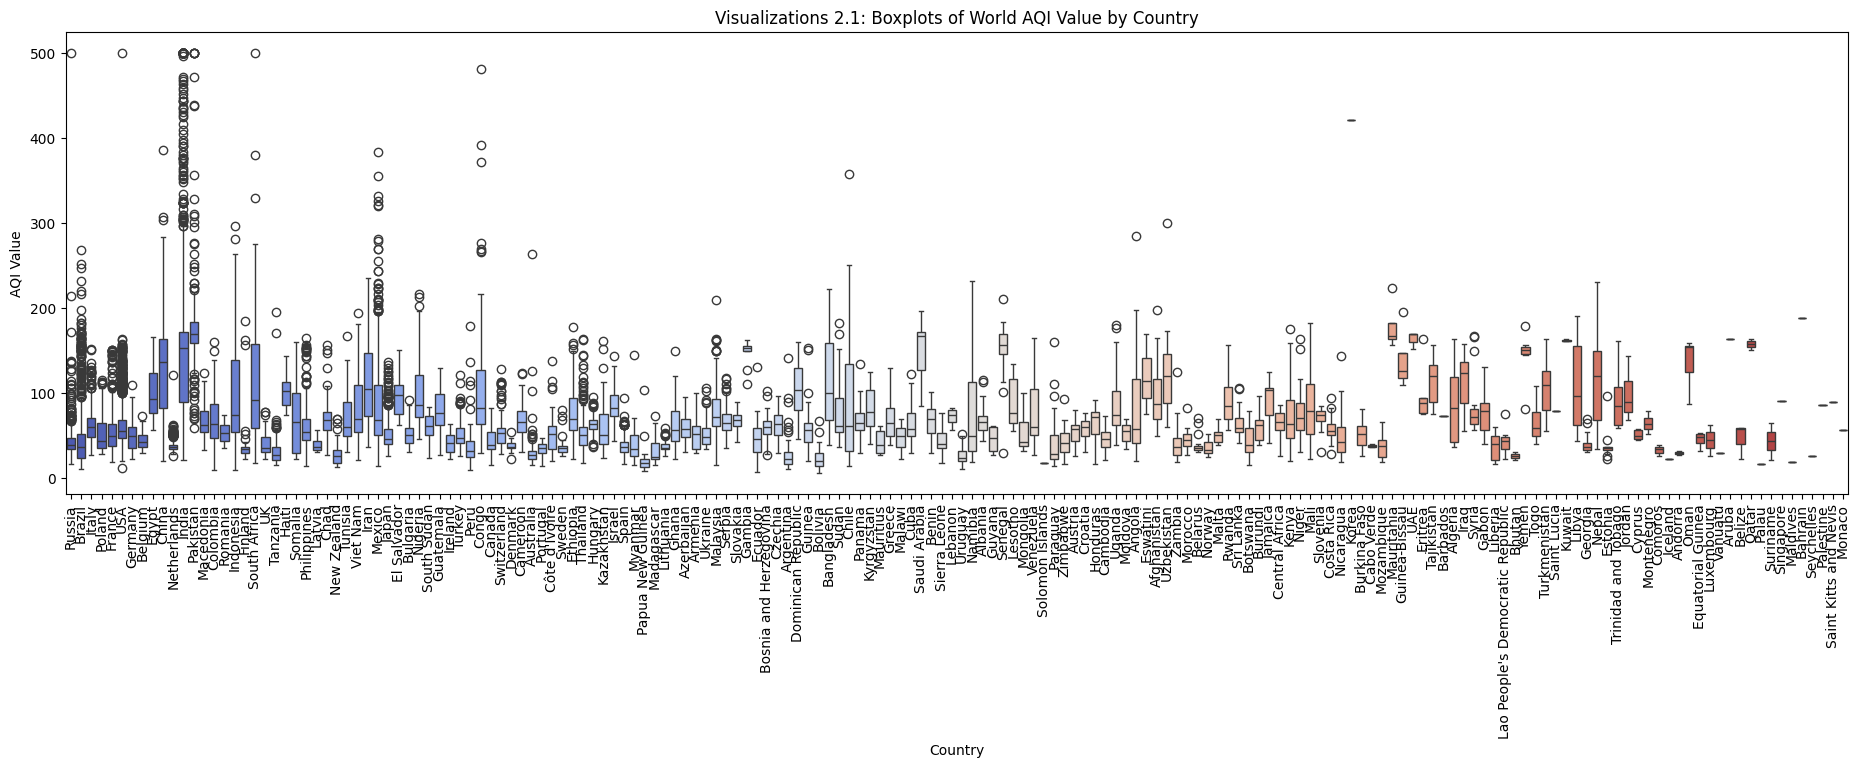

/var/folders/b4/pvyx0_kn49z728rc0h1kfgwm0000gn/T/ipykernel_12885/3901746662.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_pollution, x='Country', y='CO AQI Value', palette='coolwarm')


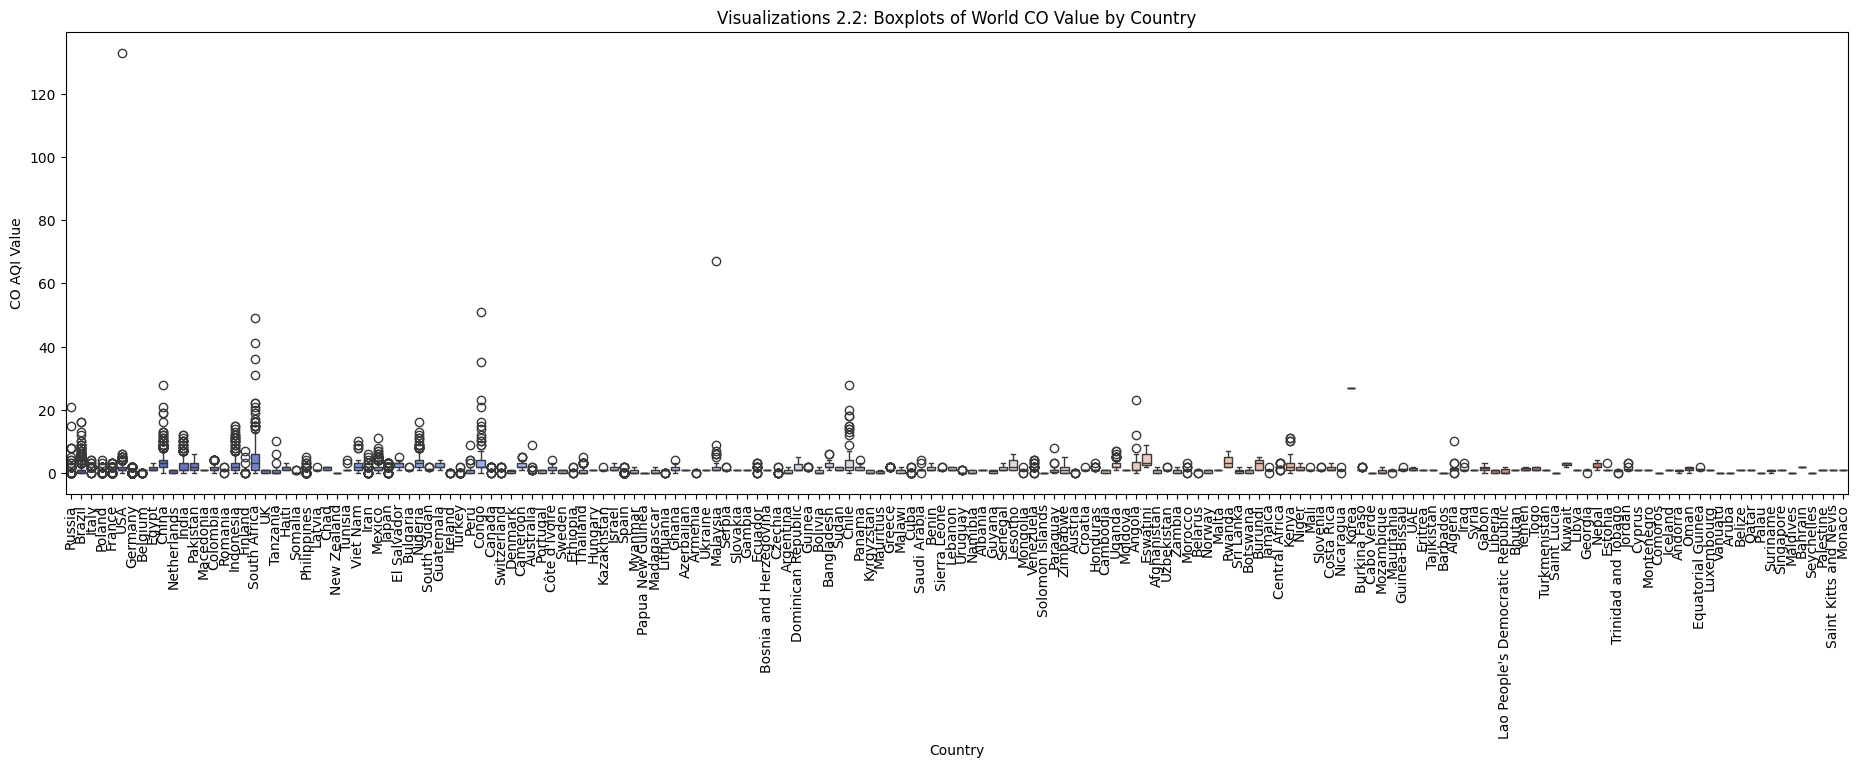

In [42]:
plt.figure(figsize=(23, 6))
sns.boxplot(data=df_pollution, x='Country', y='AQI Value', palette='coolwarm')
plt.xlabel('Country')
plt.ylabel('AQI Value')
plt.title('Visualizations 2.1: Boxplots of World AQI Value by Country')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(23, 6))
sns.boxplot(data=df_pollution, x='Country', y='CO AQI Value', palette='coolwarm')
plt.xlabel('Country')
plt.ylabel('CO AQI Value')
plt.title('Visualizations 2.2: Boxplots of World CO Value by Country')
plt.xticks(rotation=90)
plt.show()

**MAX OUTLIERS FOR SELECTED COUNTRIES**

In [43]:
#finding highest outliers for USA
usa_max_aqi = df_pollution[df_pollution['Country'] == 'USA']['AQI Value'].max()
usa_max_aqi

500

In [44]:
#finding highest outliers for Russia
rus_max_aqi = df_pollution[df_pollution['Country'] == 'Russia']['AQI Value'].max()
rus_max_aqi

500

In [45]:
#finding highest outliers for USA
usa_max_co = df_pollution[df_pollution['Country'] == 'USA']['CO AQI Value'].max()
usa_max_co

133

In [46]:
#finding highest outliers for Congo
cong_max_co = df_pollution[df_pollution['Country'] == 'Congo']['CO AQI Value'].max()
cong_max_co

51

**Dirties Countries:**

*Based on the outliers from above boxplots: comparatively countries like Russia, Brazil, USA,China, India, Pakistan, South Africa, Mexico, Congo and Chile with the max AQI.The max AQI value is 500 for all countries like the standard AQI*

*The presence of such outliers emphasizes the importance of targeted efforts to enhance air quality in the identified regions.The outputs can be different if we compare similarly for NO2, OZONE, PM2.5 and PM10 as the air quality varies significantly indicating poor air quality.This may be due to various factors, including industrial growth, vehicular pollution, urbanization and geographical features.*

*Similarly, Russia, China, South Africa, Congo, Malaysia, Chile and Angola have noticable max outliers than others*

*The max CO values for all selected countries was*

```
USA: 133
Congo: 51
Malaysia:69
South Africa: 49
China: 28
Chile: 28
Russia: 21
India: 12
Mexico: 11
Pakistan: 6
```

#II. USA COUNTRY'S STATE LEVEL AIR POLLUTION VISUALIZATION

**Taking United States of America (USA) as country level visualization example**

**Grouping by State and Year:** *Using the pandas groupby method to group the df_USA_Pol DataFrame by two columns: "State" and "Year." This created subsets of data for each unique combination of state and year and calculated median value for columns "Median AQI," "Max AQI," and "90th Percentile AQI".  The result then stored in the df_state_year data frame and made it easier to analyze and visualize how air quality varies across different states and over time.*

**Merging dataframes:** *The merged_stateAQI DataFrame is obtained by combining the state geometries from df_usstates with the air quality data (median AQI, max AQI, and 90th percentile AQI) from df_state_year allowing us to create visualizations associated with air quality metrics with geographic boundaries of different states in the USA*

In [47]:
df_usstates.head(2)

id    State                                           geometry
0  AL  Alabama  POLYGON ((-87.35930 35.00118, -85.60667 34.984...
1  AK   Alaska  MULTIPOLYGON (((-131.60202 55.11798, -131.5691...

In [48]:
df_USA_Pol.head(2)

State   County  Year  Days with AQI  Good Days  Moderate Days  \
0  Alabama  Baldwin  2019            271        237             34   
1  Alabama     Clay  2019            107         97             10   

   Unhealthy for Sensitive Groups Days  Unhealthy Days  Very Unhealthy Days  \
0                                    0               0                    0   
1                                    0               0                    0   

   Hazardous Days  Max AQI  90th Percentile AQI  Median AQI  Days CO  \
0               0       80                   52          37        0   
1               0       67                   50          30        0   

   Days NO2  Days Ozone  Days PM2.5  Days PM10     State_County  
0         0         220          51          0  Alabama_Baldwin  
1         0           0         107          0     Alabama_Clay

In [49]:
#grouping state DataFrame by the 'State' and year column and find the median value for each state as df_state_year
df_state_year= df_USA_Pol.groupby(["State", "Year"])[["Days with AQI", "Days CO", "Days NO2", "Days Ozone", "Days PM2.5", "Days PM10"]].median()
df_state_year

Days with AQI  Days CO  Days NO2  Days Ozone  Days PM2.5  \
State     Year                                                             
Alabama   2019          280.0      0.0       0.0       188.0       107.0   
          2020          348.0      0.0       0.0       140.0       108.0   
          2021          354.0      0.0       0.0       151.0       110.0   
          2022          180.0      0.0       0.0        79.5        88.0   
Alaska    2019          360.0      0.0       0.0         0.0       186.0   
...                       ...      ...       ...         ...         ...   
Wisconsin 2022          267.0      0.0       0.0       183.0        58.0   
Wyoming   2019          365.0      0.0       0.5       338.5         2.5   
          2020          366.0      0.0       0.0       292.5         8.0   
          2021          365.0      0.0       0.0       313.0        13.5   
          2022          186.0      0.0       0.0       163.5         0.5   

                Days PM10  
State     Year             
Alabama   2019        0.0  
          2020        0.0  
          2021        0.0  
          2022        0.0  
Alaska    2019        6.0  
...                   ...  
Wisconsin 2022        0.0  
Wyoming   2019        6.5  
          2020       11.5  
          2021        7.5  
          2022        2.5  

[215 rows x 6 columns]

In [50]:
# # Merging the air quality data with the state geometries using the 'State' column
merged_stateAQI = df_usstates.merge(df_state_year, on='State')
merged_stateAQI.head()

id    State                                           geometry  \
0  AL  Alabama  POLYGON ((-87.35930 35.00118, -85.60667 34.984...   
1  AL  Alabama  POLYGON ((-87.35930 35.00118, -85.60667 34.984...   
2  AL  Alabama  POLYGON ((-87.35930 35.00118, -85.60667 34.984...   
3  AL  Alabama  POLYGON ((-87.35930 35.00118, -85.60667 34.984...   
4  AK   Alaska  MULTIPOLYGON (((-131.60202 55.11798, -131.5691...   

   Days with AQI  Days CO  Days NO2  Days Ozone  Days PM2.5  Days PM10  
0          280.0      0.0       0.0       188.0       107.0        0.0  
1          348.0      0.0       0.0       140.0       108.0        0.0  
2          354.0      0.0       0.0       151.0       110.0        0.0  
3          180.0      0.0       0.0        79.5        88.0        0.0  
4          360.0      0.0       0.0         0.0       186.0        6.0

#Visualization 3: Yearly Days with AQI of USA's States - Year 2019-2020-2021-2022

*The visualization provided the annual count of "Days with AQI" across the USA states from the years 2019-2022. The value ranged from 0 to 365 days symbolizing the number of days in a year and presented in separate figures.*

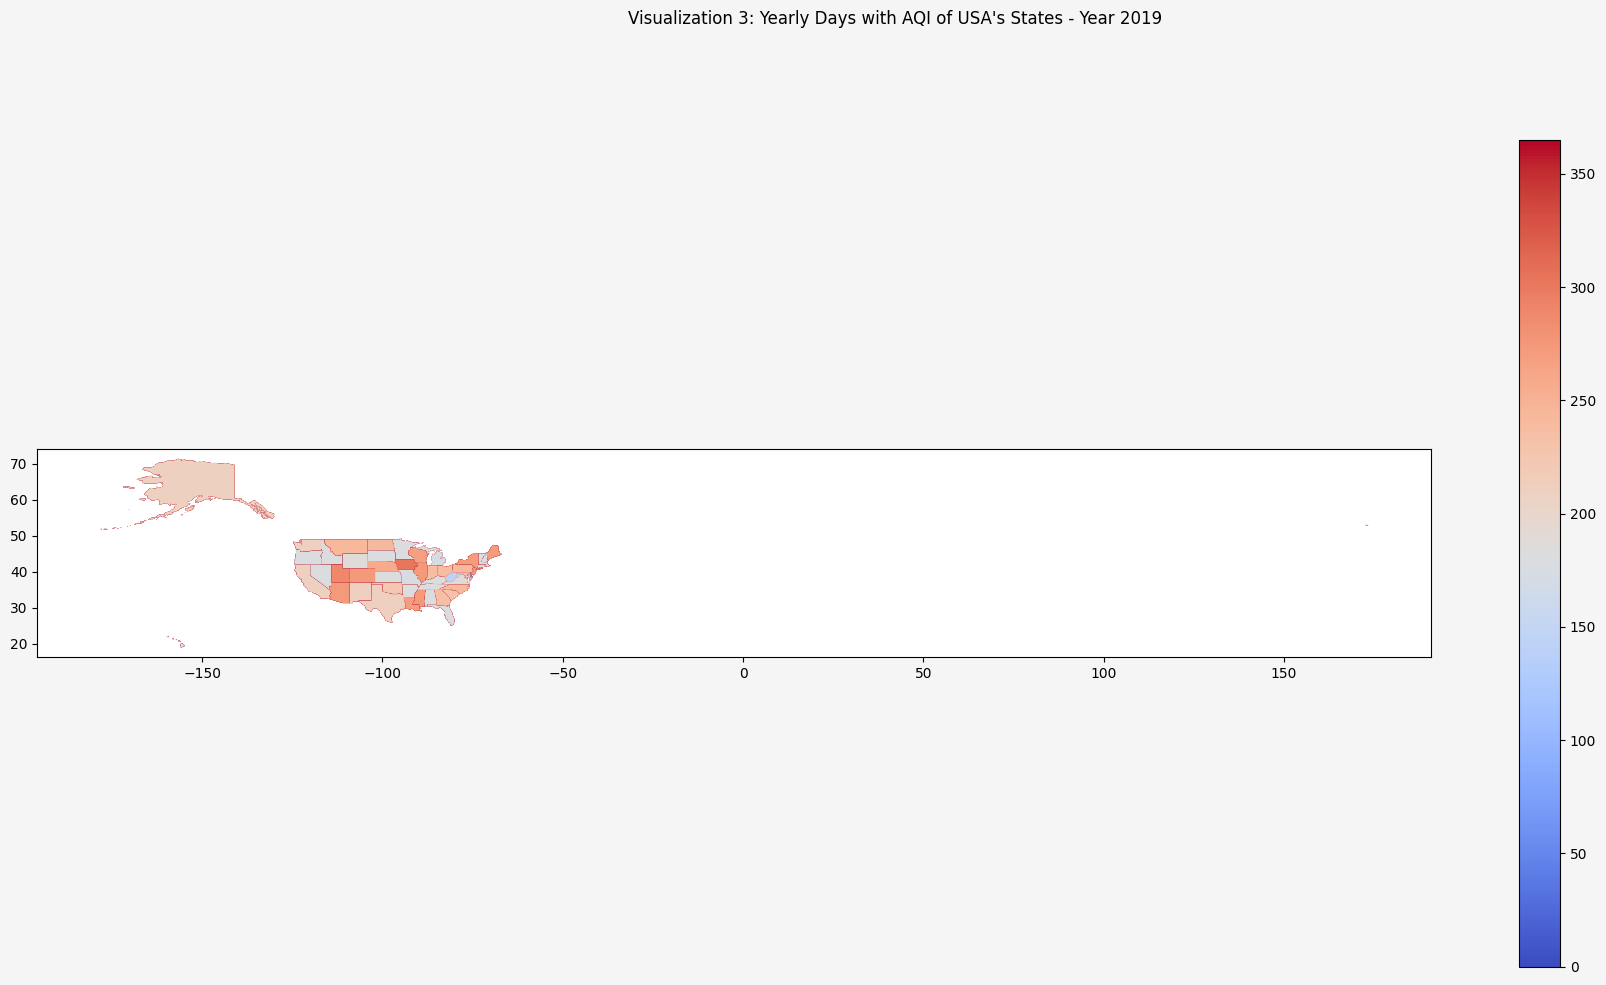

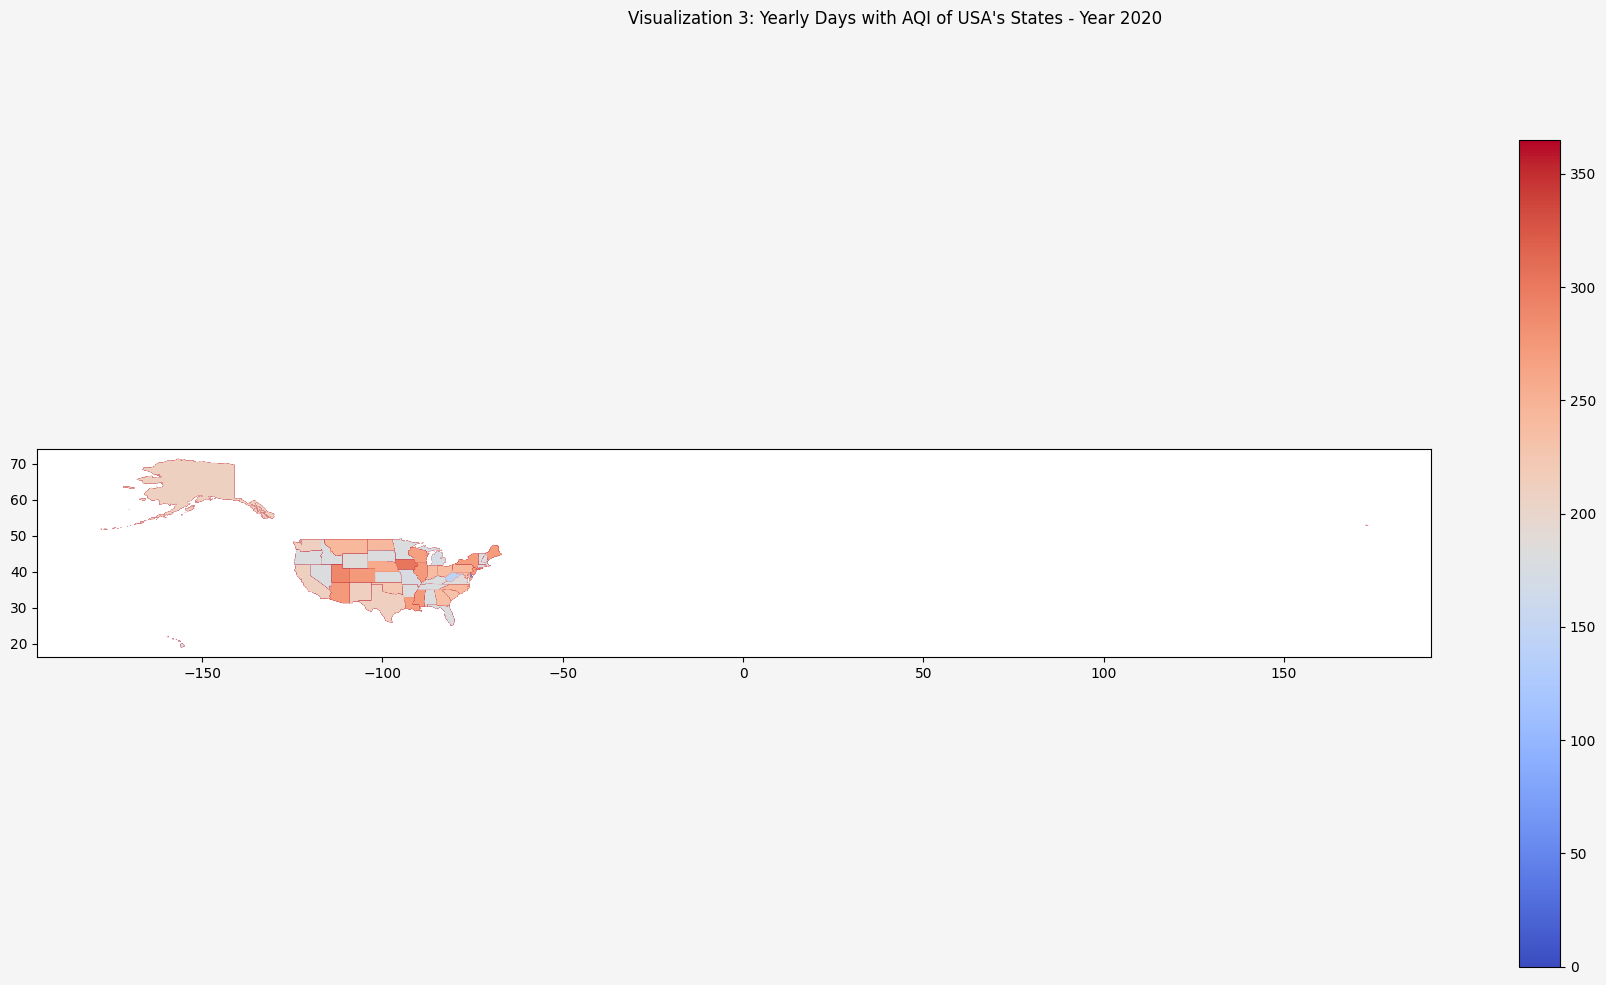

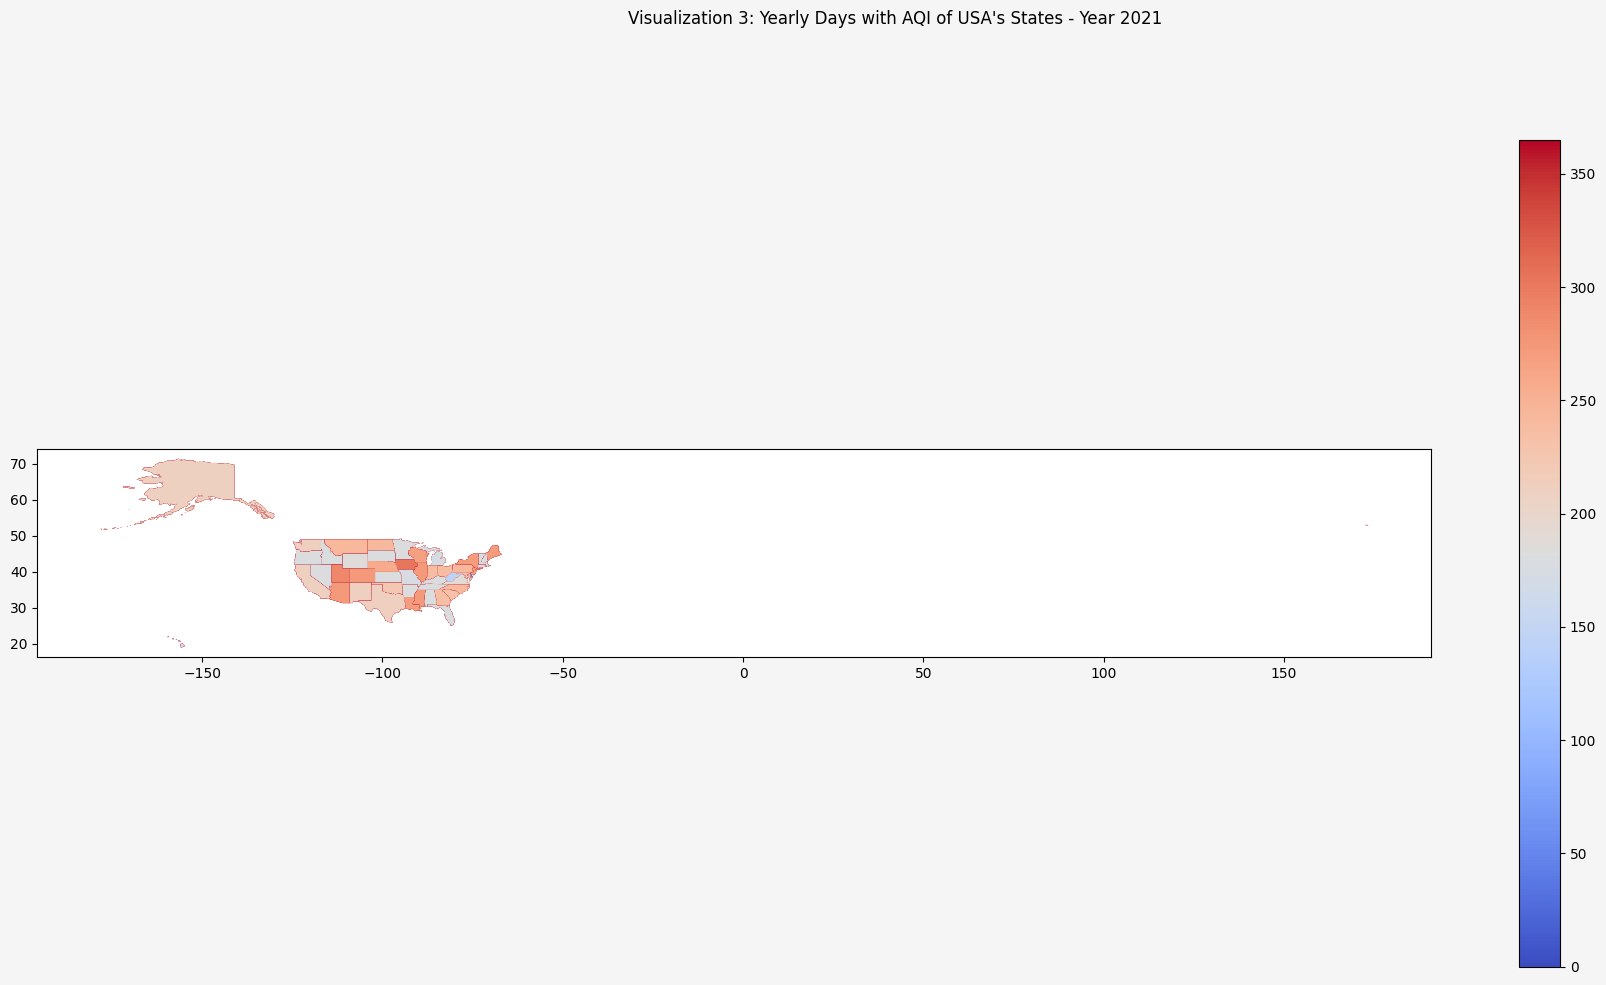

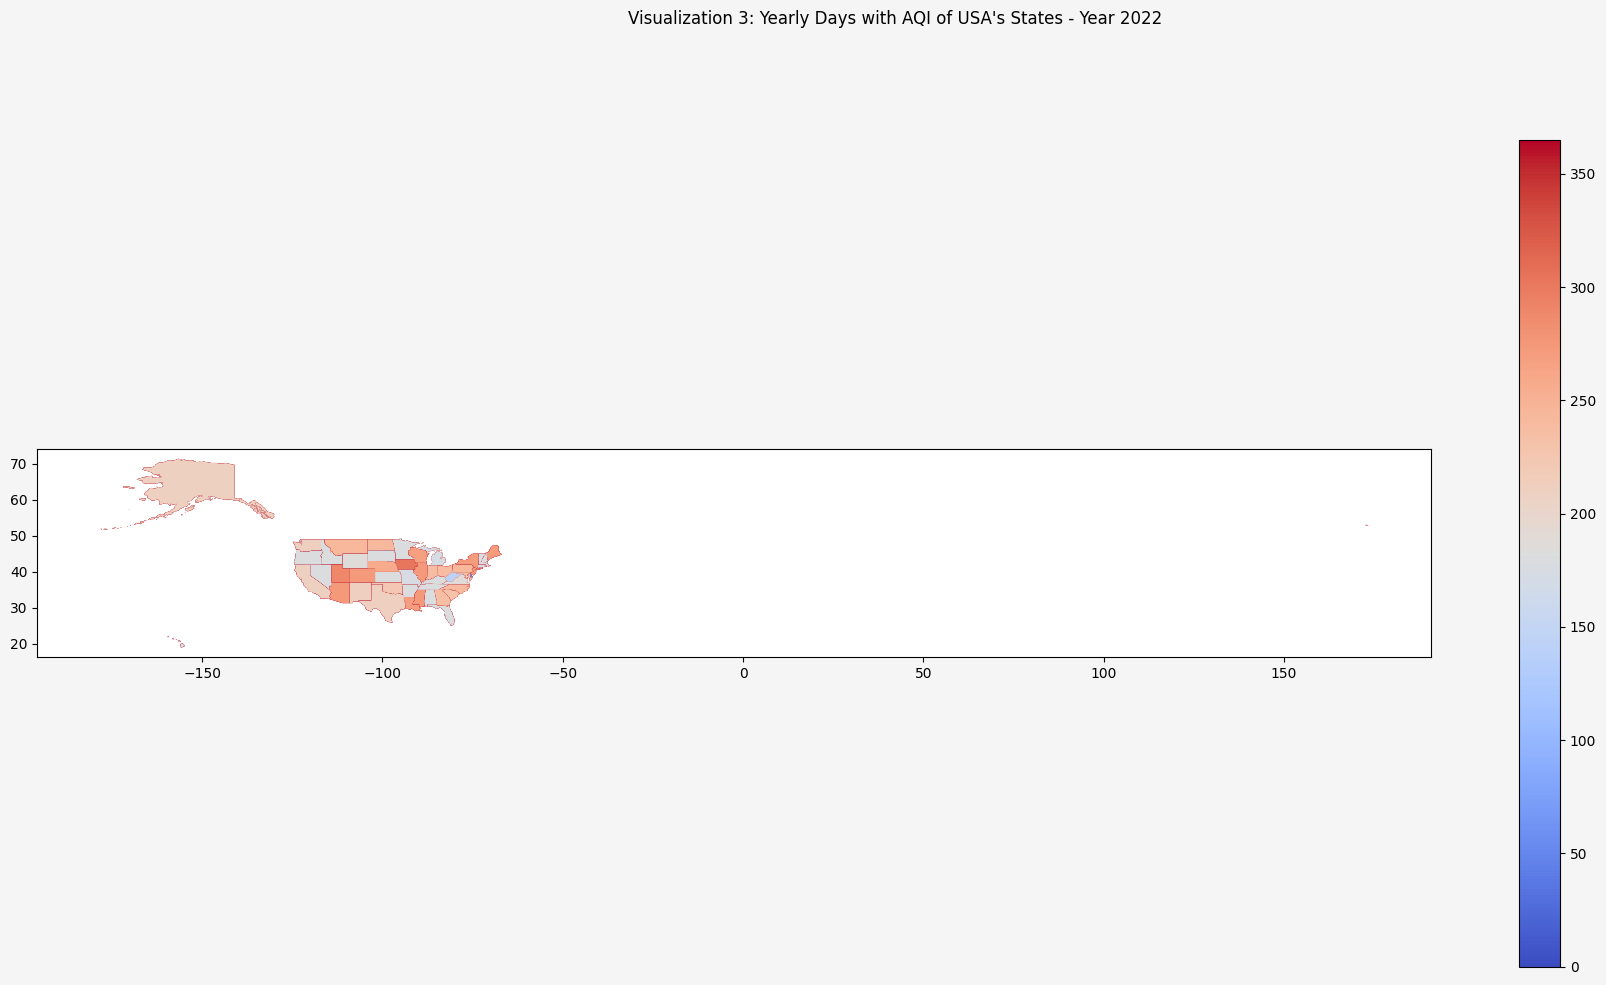

In [51]:
# Colormap for AQI
cmap = "coolwarm"

# Years to plot
years = [2019, 2020, 2021, 2022]

# AQI column to visualize
aqi_column = 'Days with AQI'
vmin = 0
vmax = 365

for year in years:
    # Filtering data for the current year
    df_year = df_USA_Pol[df_USA_Pol['Year'] == year]


    # Creating a separate figure for each year
    fig, ax = plt.subplots(1, figsize=(18, 10), facecolor='whitesmoke')
    fig.suptitle(f"Visualization 3: Yearly Days with AQI of USA's States - Year {year}")

    # Ploting the map using the AQI column for coloring
    merged_stateAQI.plot(column=aqi_column, cmap=cmap, linewidth=0.8, ax=ax, legend=True, aspect="equal", vmin=vmin, vmax=vmax)

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

#Visualization 4: Yearly Median AQI of USA's States - Years 2019-2020-2021-2022

*The choropleth maps of yearly median Air Quality Index (AQI) of USA states has been visualized for the years 2019, 2020, 2021, and 2022.Here, the data by year is filtered and merged with air quality data with state geometries, and created separate visualizations for each year. This helps to compare air quality trends across different years (2019, 2020, 2021 and 2022) for USA state.*

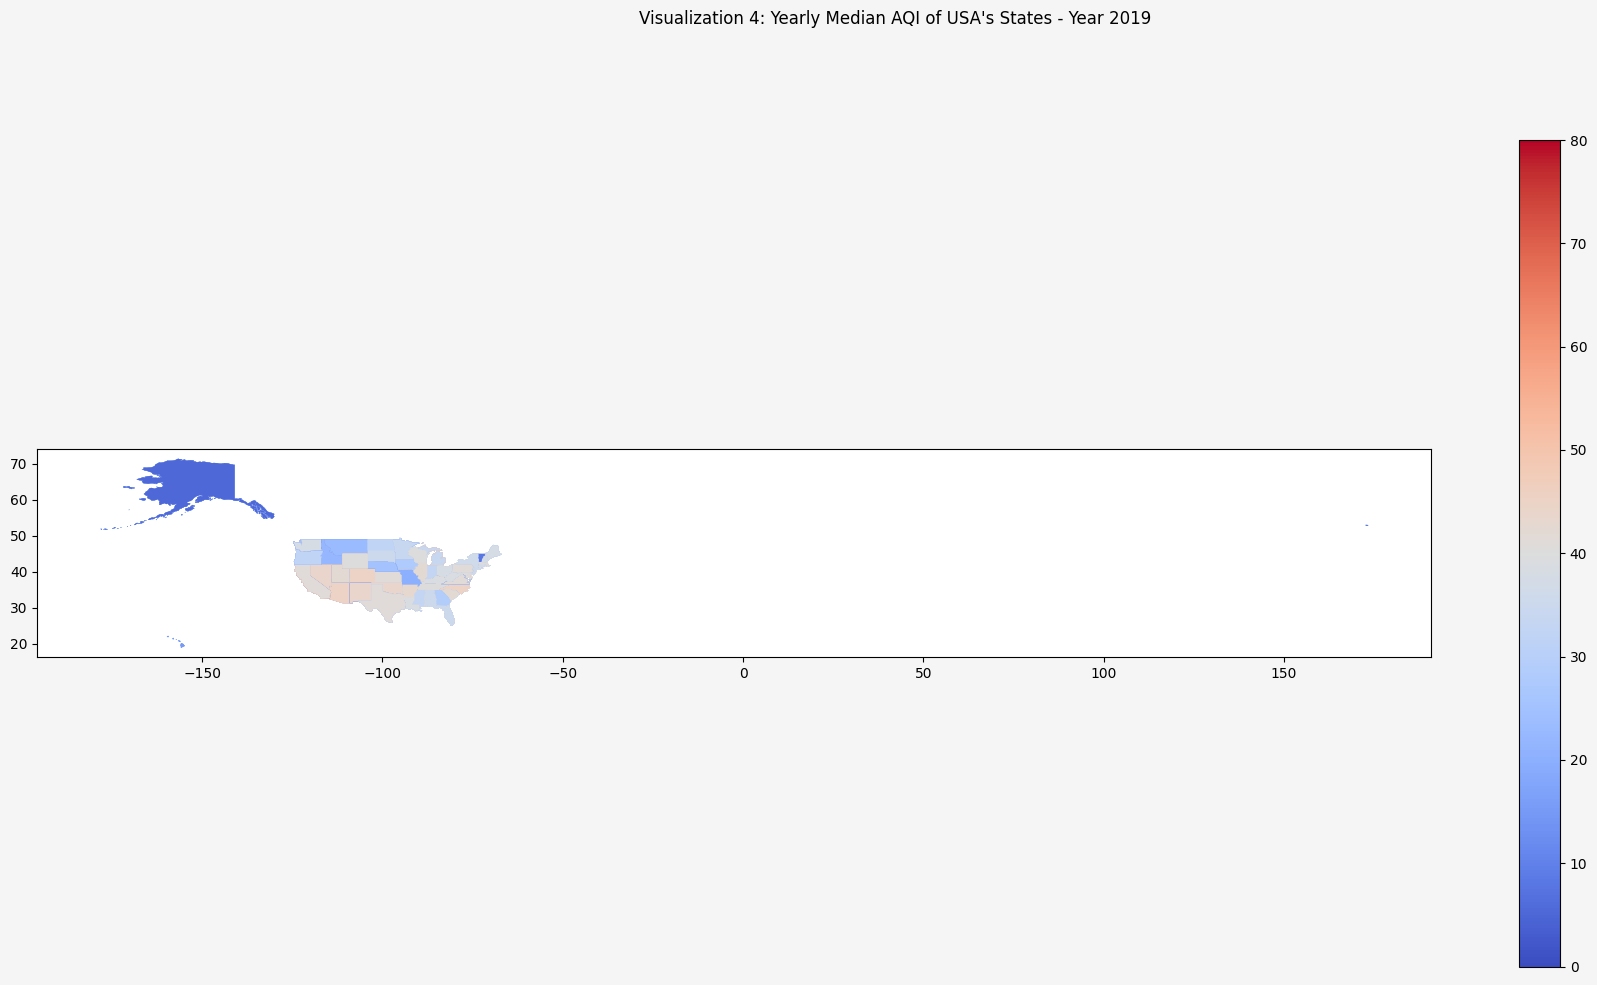

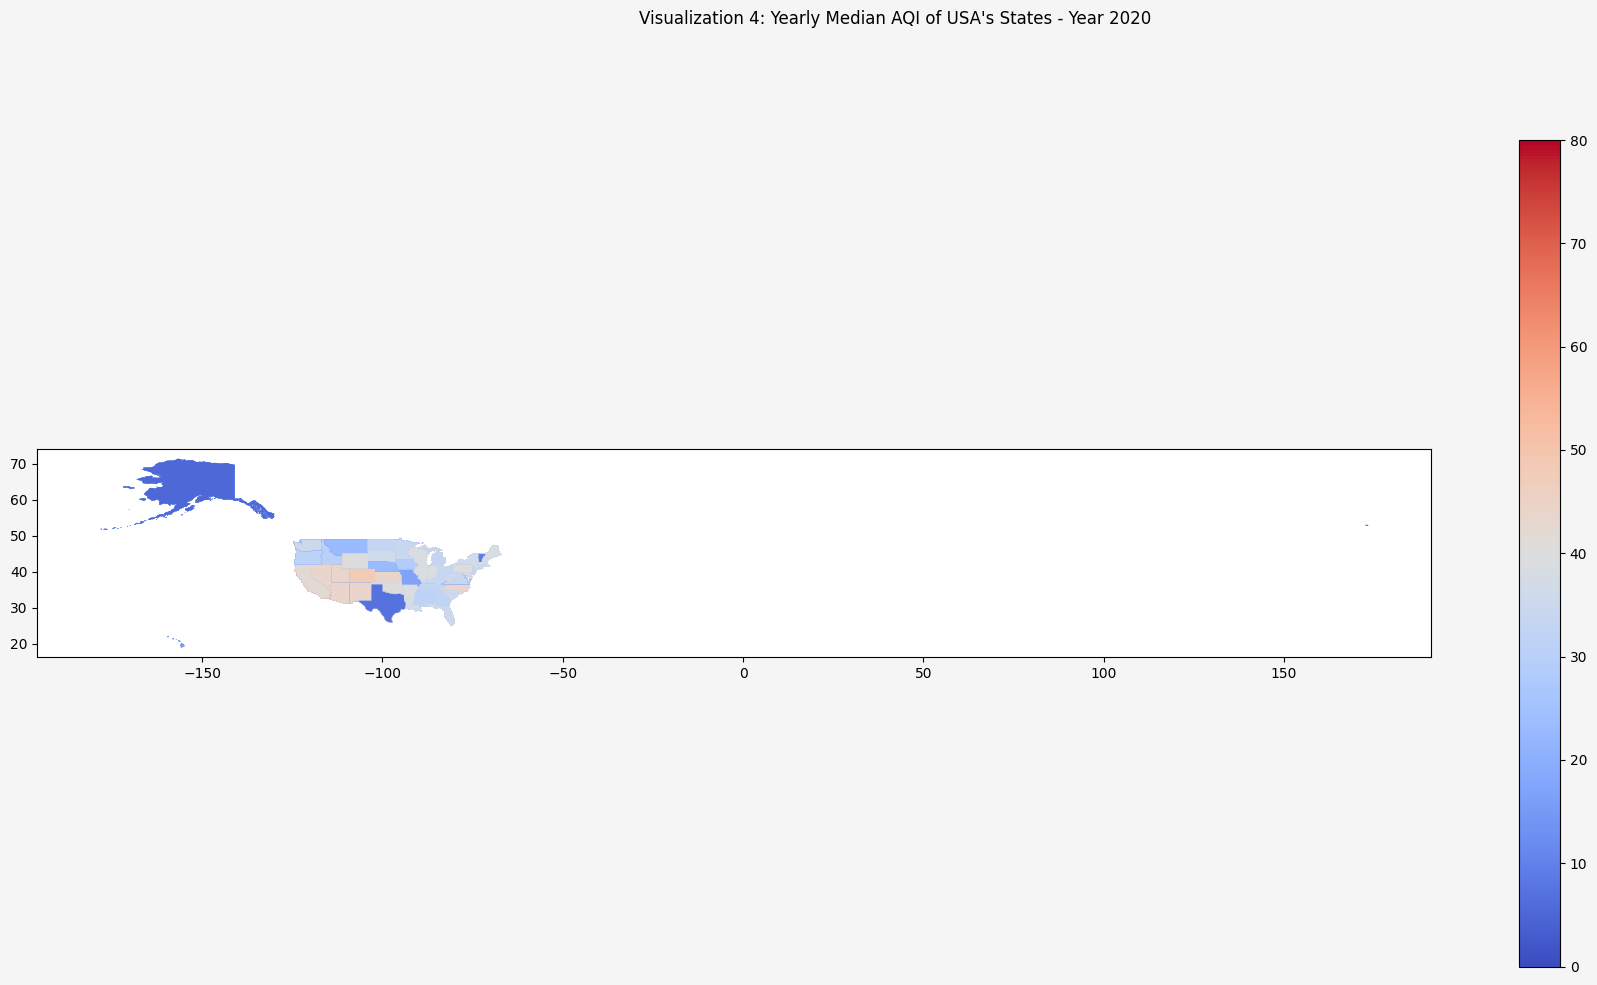

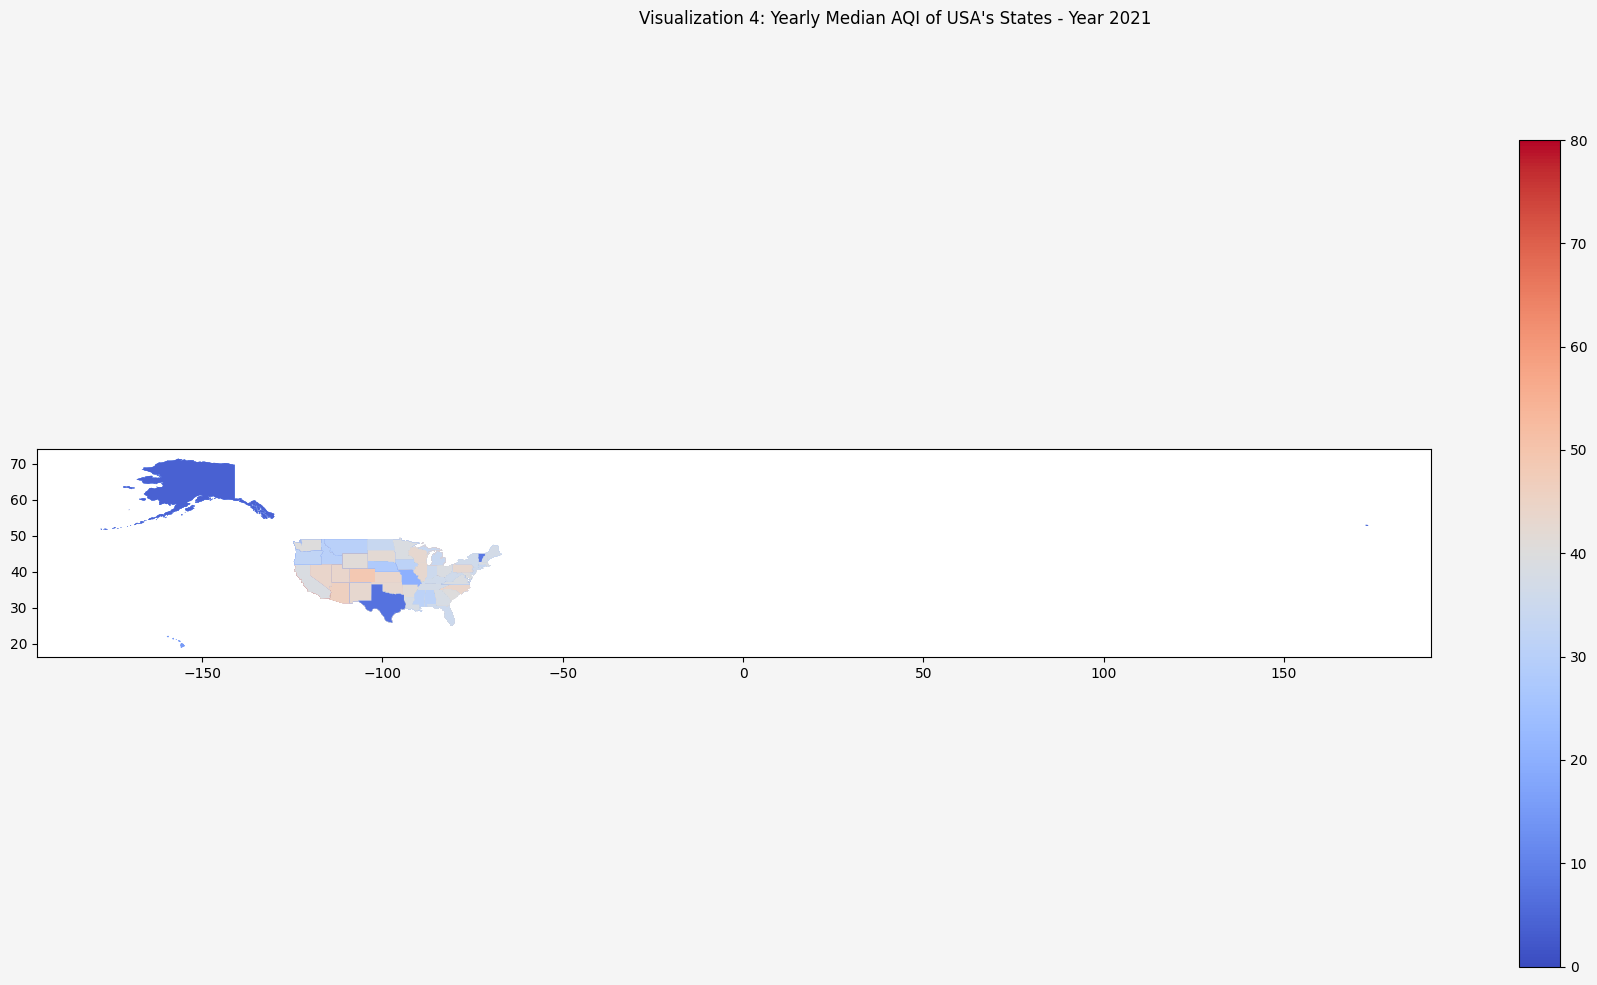

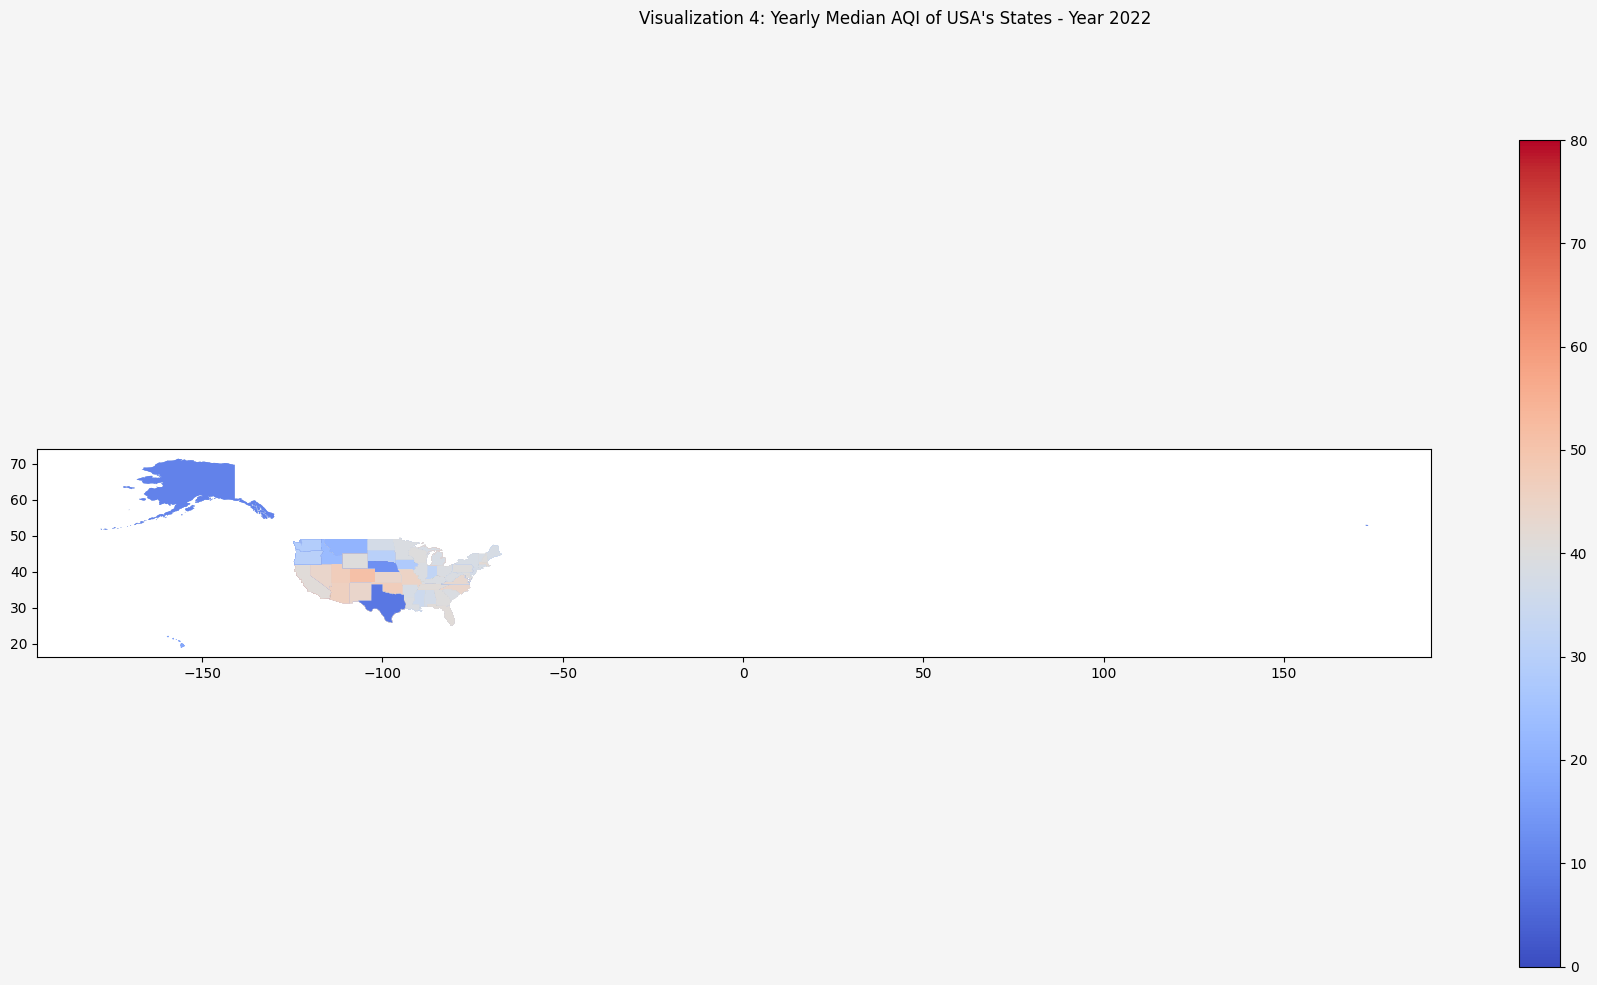

In [52]:
# Years to plot
years = [2019, 2020, 2021, 2022]
cmap = "coolwarm"
vmin = 0
vmax = 80
aqi_column = 'Median AQI' #column to plot


for year in years:
    # Filtering data for the current year
    df_year = df_USA_Pol[df_USA_Pol['Year'] == year]

    # Merging the air quality data with the state geometries using the 'State' column
    merged_state = df_usstates.merge(df_year, on='State')

    # Creating a separate figure for each year
    fig, ax = plt.subplots(1, figsize=(18, 10), facecolor='whitesmoke')
    fig.suptitle(f"Visualization 4: Yearly Median AQI of USA's States - Year {year}")

    # Plotting the map using the AQI column for coloring
    merged_state.plot(column=aqi_column, cmap=cmap, linewidth=0.8, ax=ax, legend=True, aspect="equal", vmin=vmin, vmax=vmax)

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

In [53]:
# Group the data by 'Year' and 'State' and calculate max and min AQI values
max_min_aqi = df_USA_Pol[df_USA_Pol['State'] == 'Texas'].groupby('Year')['Median AQI'].agg(['max','median' , 'min'])

# Rename the columns for clarity
max_min_aqi = max_min_aqi.rename(columns={'max': 'Max AQI','median':'Median AQI', 'min': 'Min AQI'})

# Print the results
print(max_min_aqi)

      Max AQI  Median AQI  Min AQI
Year                              
2019       53        39.0       19
2020       55        37.0        6
2021       54        37.0        6
2022       56        42.0        5


In [54]:
# Group the data by 'Year' and 'State' and calculate max and min AQI values
max_min_aqi = df_USA_Pol[df_USA_Pol['State'] == 'Kansas'].groupby('Year')['Median AQI'].agg(['max','median' , 'min'])

# Rename the columns for clarity
max_min_aqi = max_min_aqi.rename(columns={'max': 'Max AQI','median':'Median AQI', 'min': 'Min AQI'})

# Print the results
print(max_min_aqi)

      Max AQI  Median AQI  Min AQI
Year                              
2019       41        36.0       12
2020       44        37.0       11
2021       44        42.0       17
2022       44        41.5       15


**Comparing Air Quality Before and After COVID-19:**

*From 2019 to 2022, in 2022, three states, namely Texas (which had poor air quality in 2019), Nebraska (with high AQI in 2019), and Montana (which had relatively good air quality in 2019), maintained the best air quality while Alaska remained consistent throughout these years. On the other hand, Kansas saw a decline in air quality over this period.*

*During 2020, the year of the COVID-19 pandemic, several states, including Louisiana, Alabama, Georgia, South Carolina, Oklahoma, Tennessee, Kentucky, Ohio, West Virginia, Virginia, and Michigan, exhibited improvements in air quality. However, in the subsequent years, their air quality began to deteriorate once again.*

*Here, we have grouped the data by the 'Year' and 'State' columns and then aggregated the maximum and minimum AQI values that provided us with the range of AQI values for Texas in different years. Clearly, the Texas air quality summary shows that it has improved from 2019 to 2022.In contrast, Kansas showed a deteriorating trend during the same period.*

*This analysis can help in understanding air quality trends over time in different states and can be valuable for making informed decisions related to air quality.*

#III. USA COUNTRY'S COUNTY LEVEL AIR POLLUTION VISUALIZATION

#Visualization 5: Yearly Median AQI of USA's Counties - Year 2019-2020-2021-2022

*The visualization generated choropleth maps to visualize the median Air Quality Index (AQI) for USA's counties across the years 2019, 2020, 2021, and 2022. By merging the county-level air quality data with the corresponding county geometries, we can observe how the AQI values vary and any trends or changes in air quality over these specific years to assess and compare air quality across different regions and time periods.*

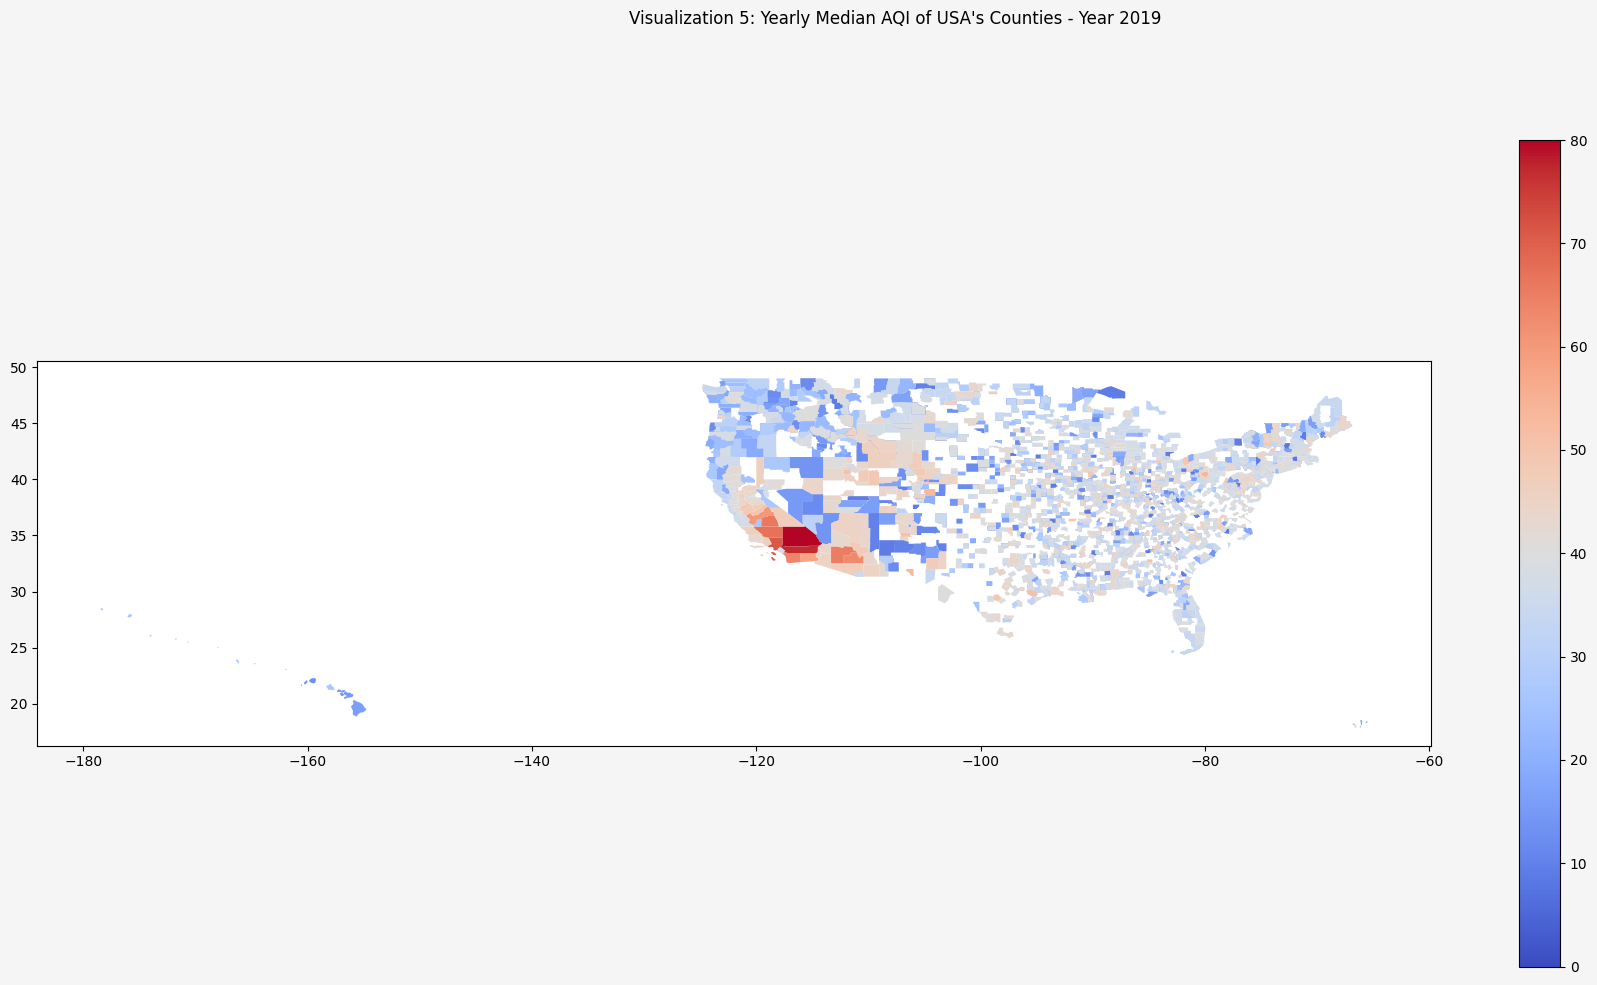

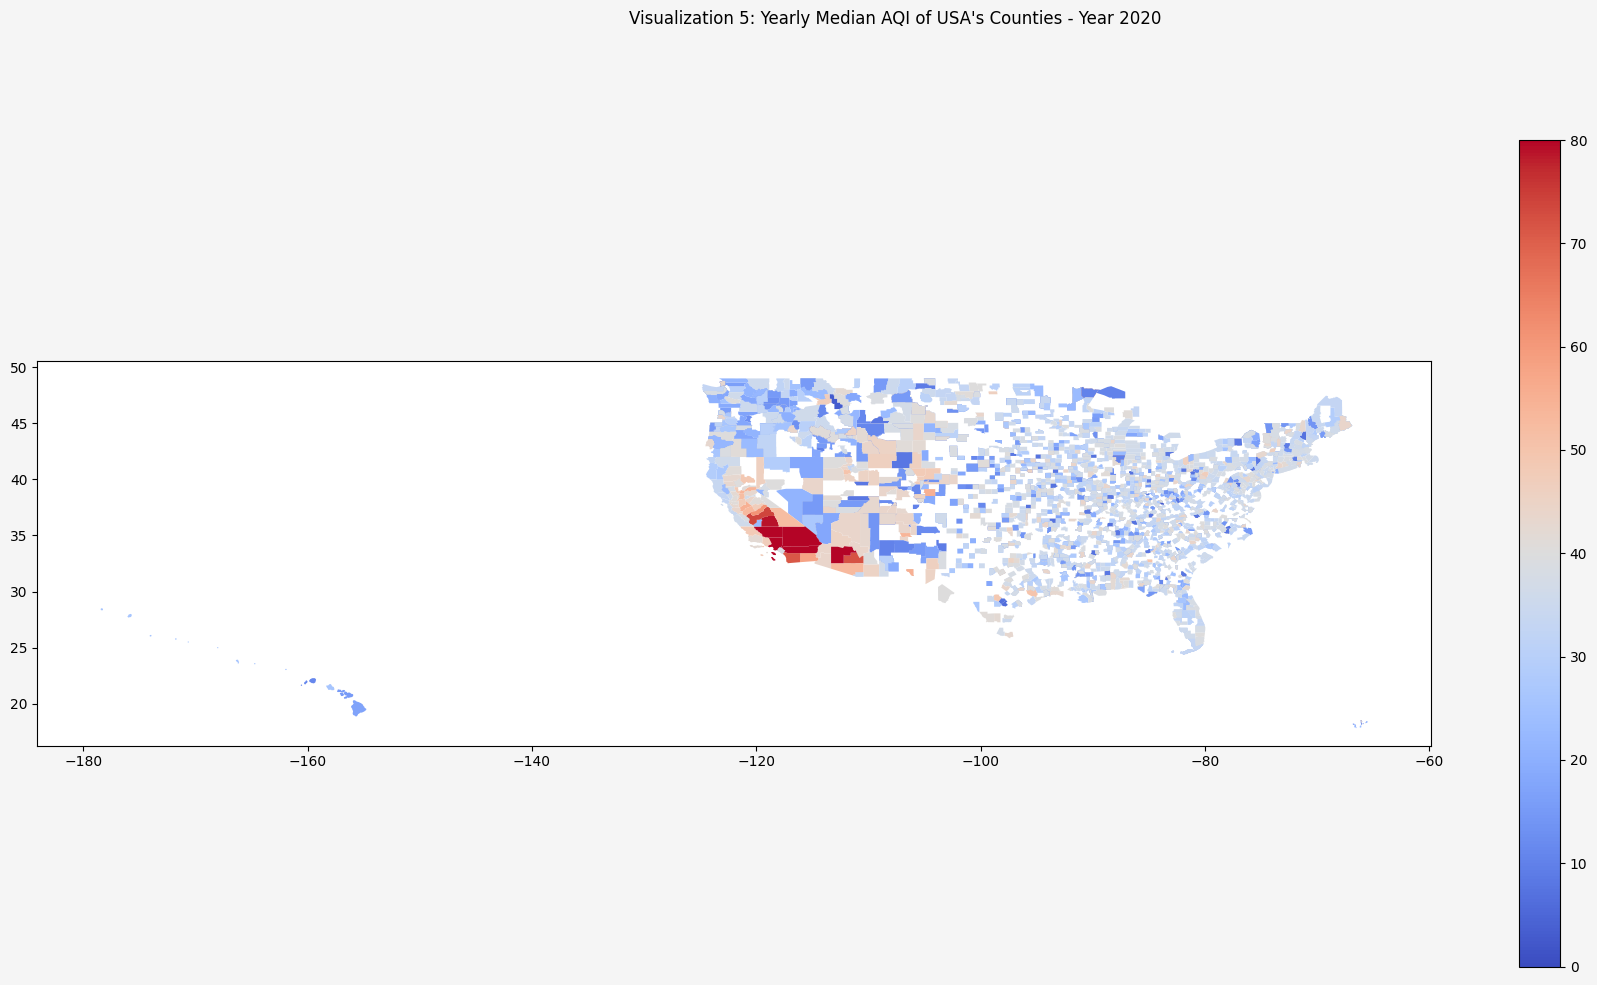

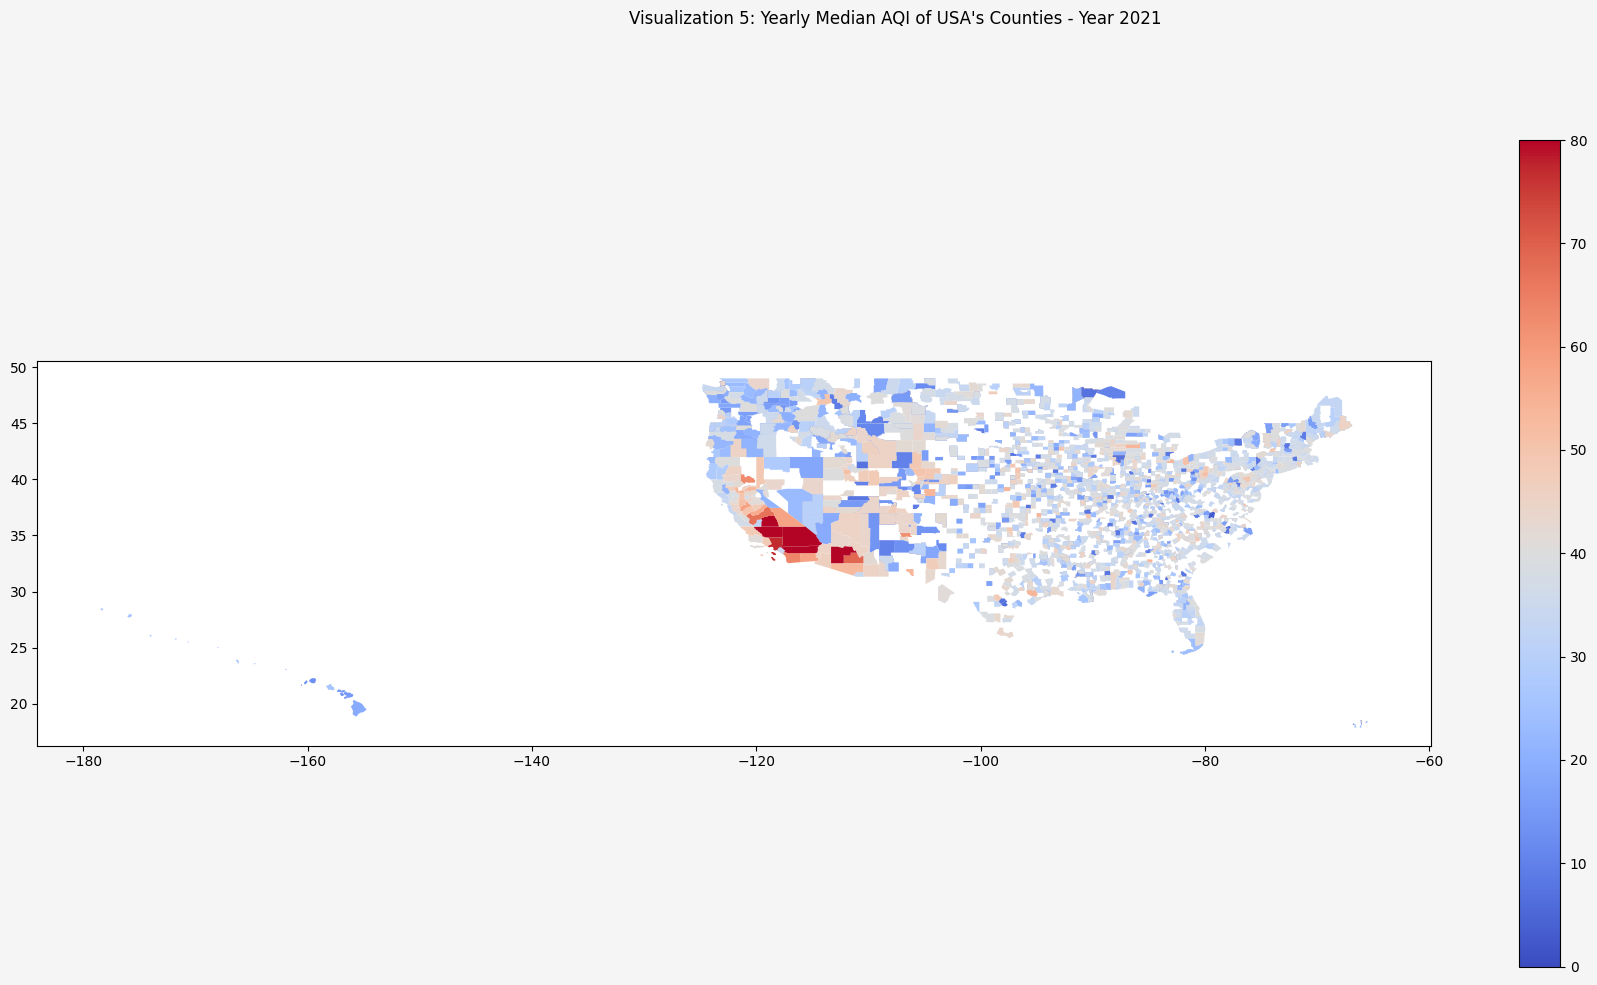

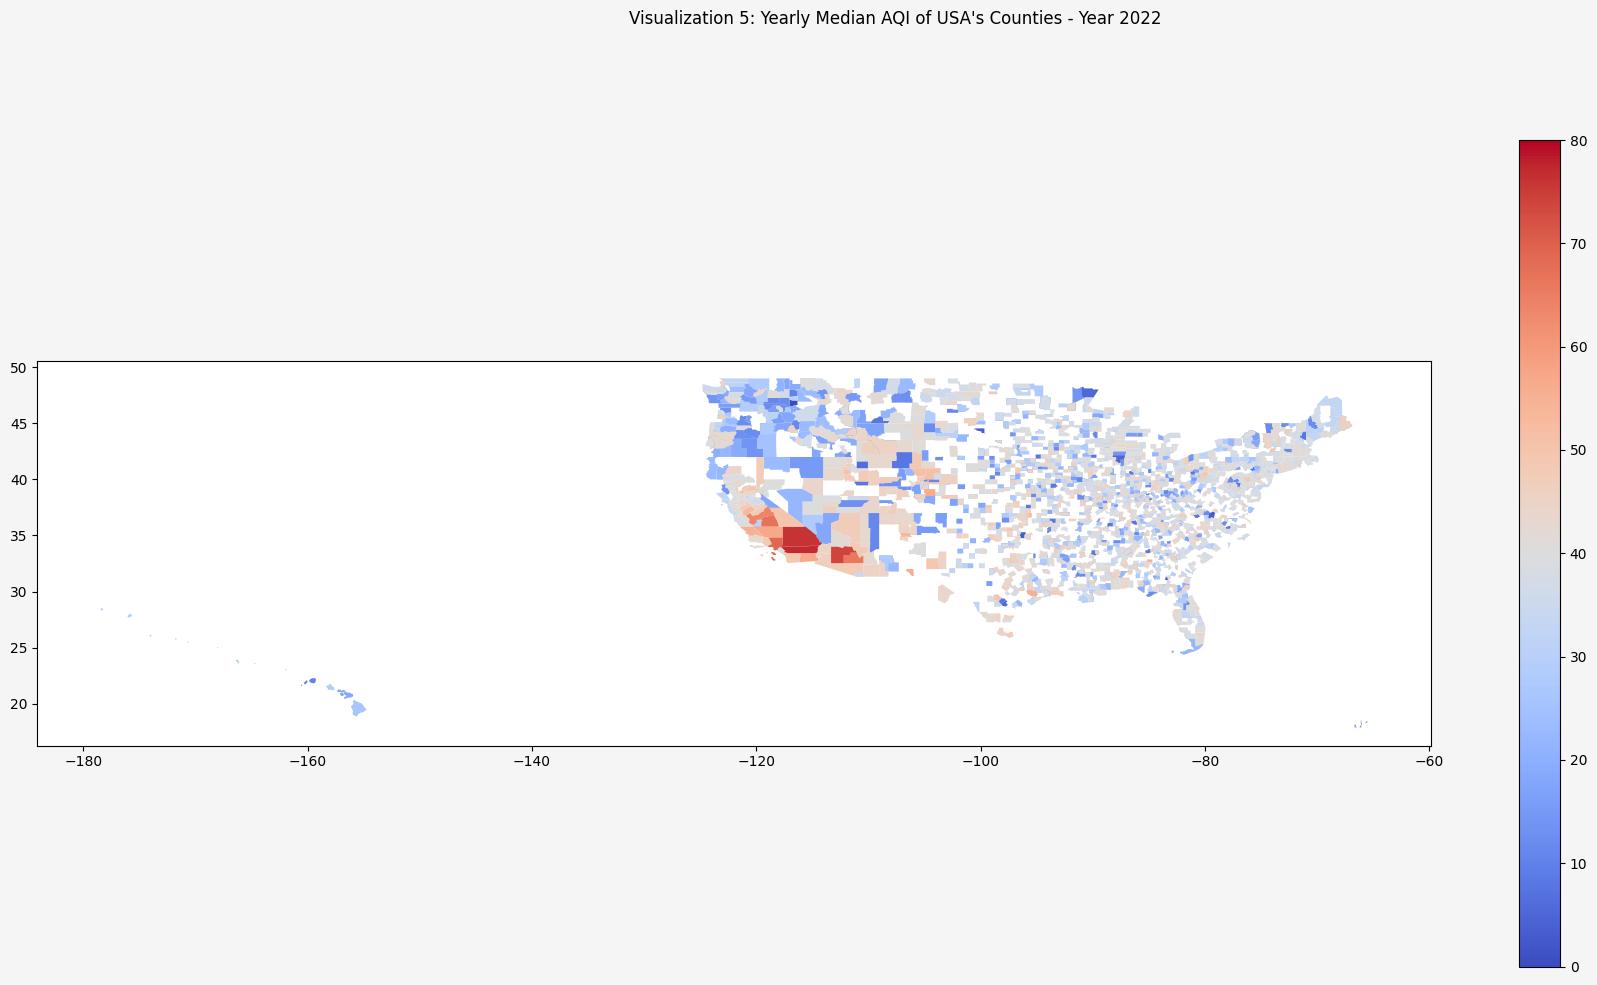

In [55]:
cmap = "coolwarm"
years = [2019, 2020, 2021, 2022]
aqi_column = 'Median AQI'
vmin = 0
vmax = 80

for year in years:
    # Filtering data for the current year
    df_year = df_USA_Pol[df_USA_Pol['Year'] == year]
    merged_county = df_uscounty_boundary.merge(df_year, on='County')

    # Creating a separate figure for each year
    fig, ax = plt.subplots(1, figsize=(18, 10), facecolor='whitesmoke')
    fig.suptitle(f"Visualization 5: Yearly Median AQI of USA's Counties - Year {year}")

    merged_county.plot(column=aqi_column, cmap=cmap, linewidth=0.8, ax=ax, legend=True, aspect="equal", vmin=vmin, vmax=vmax)

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()
#make changes with vmax, find counties and compare accordingly

*The visualizations has huge similarities and no significant differences spotted*

*We have proceeded to find the county with the highest median AQI value as highest_aqi_county from merged_county DataFrame. After identifying the county "Riverside" with the highest median AQI, the code proceeded to calculate additional statistics (max, median, and min AQI) specifically for that county over different years.And similarly for county with lowest median value as lowest_aqi_county.*

*This provided insights not only into the county with the highest median AQI but also into how the AQI values for that county have varied across multiple years.*

In [56]:
# Find the county with the highest median AQI value
highest_aqi_county = merged_county[merged_county['Median AQI'] == merged_county['Median AQI'].max()]
highest_aqi_county

geo_point_2d statefp countyfp  \
4182  {'lon': -115.993845895, 'lat': 33.7436800499}      06      065   

      countyns  geoid     County          namelsad stusab lsad classfp  ...  \
4182  00277297  06065  Riverside  Riverside County     CA   06      H1  ...   

     Hazardous Days Max AQI 90th Percentile AQI Median AQI Days CO  Days NO2  \
4182              5    1564                 151         77       0         0   

      Days Ozone Days PM2.5 Days PM10          State_County  
4182         137         33        73  California_Riverside  

[1 rows x 40 columns]

In [57]:
# Group the data by 'Year' and 'County' and calculate max and min AQI values
max_County_aqi = df_USA_Pol[df_USA_Pol['County'] == 'Riverside'].groupby('Year')['Median AQI'].agg(['max','median','min'])
# Rename the columns for clarity
max_County_aqi = max_County_aqi.rename(columns={'max': 'Max AQI','median':'Median AQI', 'min': 'Min AQI'})
# Print the results
print(max_County_aqi)

      Max AQI  Median AQI  Min AQI
Year                              
2019       77        77.0       77
2020       87        87.0       87
2021       87        87.0       87
2022       77        77.0       77


In [58]:
# Find the county with the lowest median AQI value
lowest_aqi_county = merged_county[merged_county['Median AQI'] == merged_county['Median AQI'].min()]
lowest_aqi_county

geo_point_2d statefp countyfp  \
3816  {'lon': -116.711723179, 'lat': 46.8161762124}      16      057   

      countyns  geoid County      namelsad stusab lsad classfp  ...  \
3816  00395613  16057  Latah  Latah County     ID   06      H1  ...   

     Hazardous Days Max AQI 90th Percentile AQI Median AQI Days CO  Days NO2  \
3816              0      25                   5          0       0         0   

      Days Ozone Days PM2.5 Days PM10 State_County  
3816           0        177         0  Idaho_Latah  

[1 rows x 40 columns]

In [59]:
# Group the data by 'Year' and 'State' and calculate max and min AQI values
min_County_aqi = df_USA_Pol[df_USA_Pol['County'] == 'Latah'].groupby('Year')['Median AQI'].agg(['max','median','min'])
# Rename the columns for clarity
min_County_aqi = min_County_aqi.rename(columns={'max': 'Max AQI','median':'Median AQI', 'min': 'Min AQI'})

# Print the results
print(min_County_aqi)

      Max AQI  Median AQI  Min AQI
Year                              
2019       10        10.0       10
2020       16        16.0       16
2021       15        15.0       15
2022        0         0.0        0


#Visualization 6: Yearly Days with AQI of USA's Counties - Year 2019-2020-2021-2022

*The visualization illustrates the annual "Days with AQI" data for USA counties from 2019 to 2022. The AQI values are transformed to a scale of 0 to 365, representing the total number of days in a year. Each year is represented in a separate figure, with the title denoting the specific year under examination.*


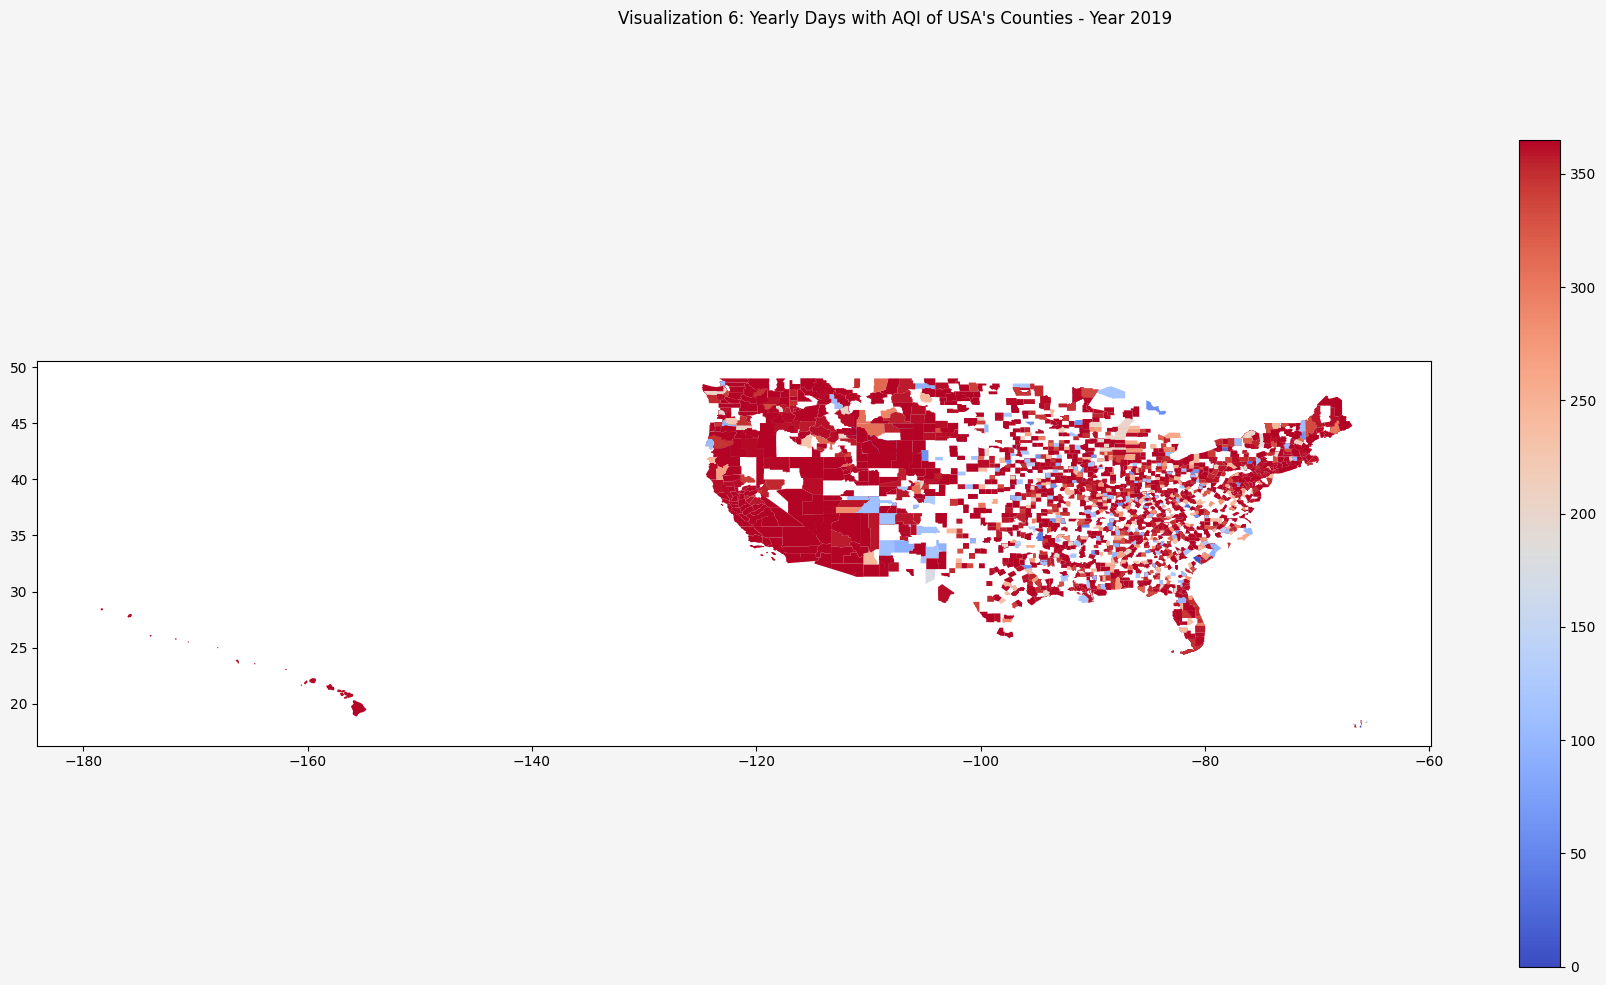

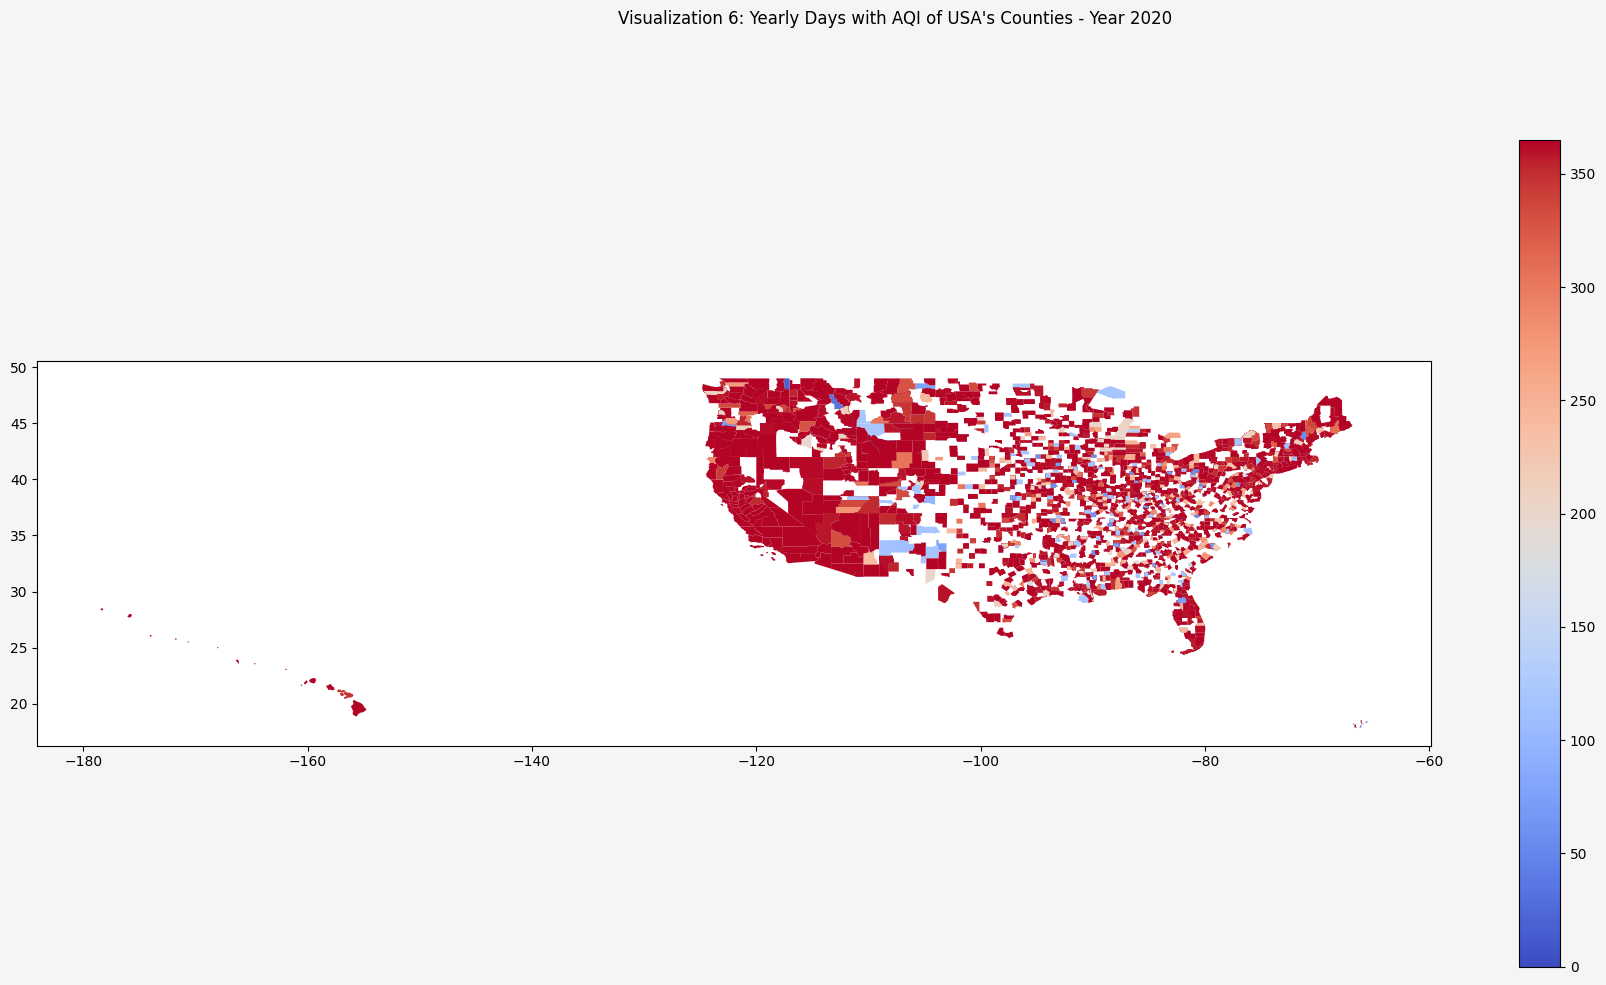

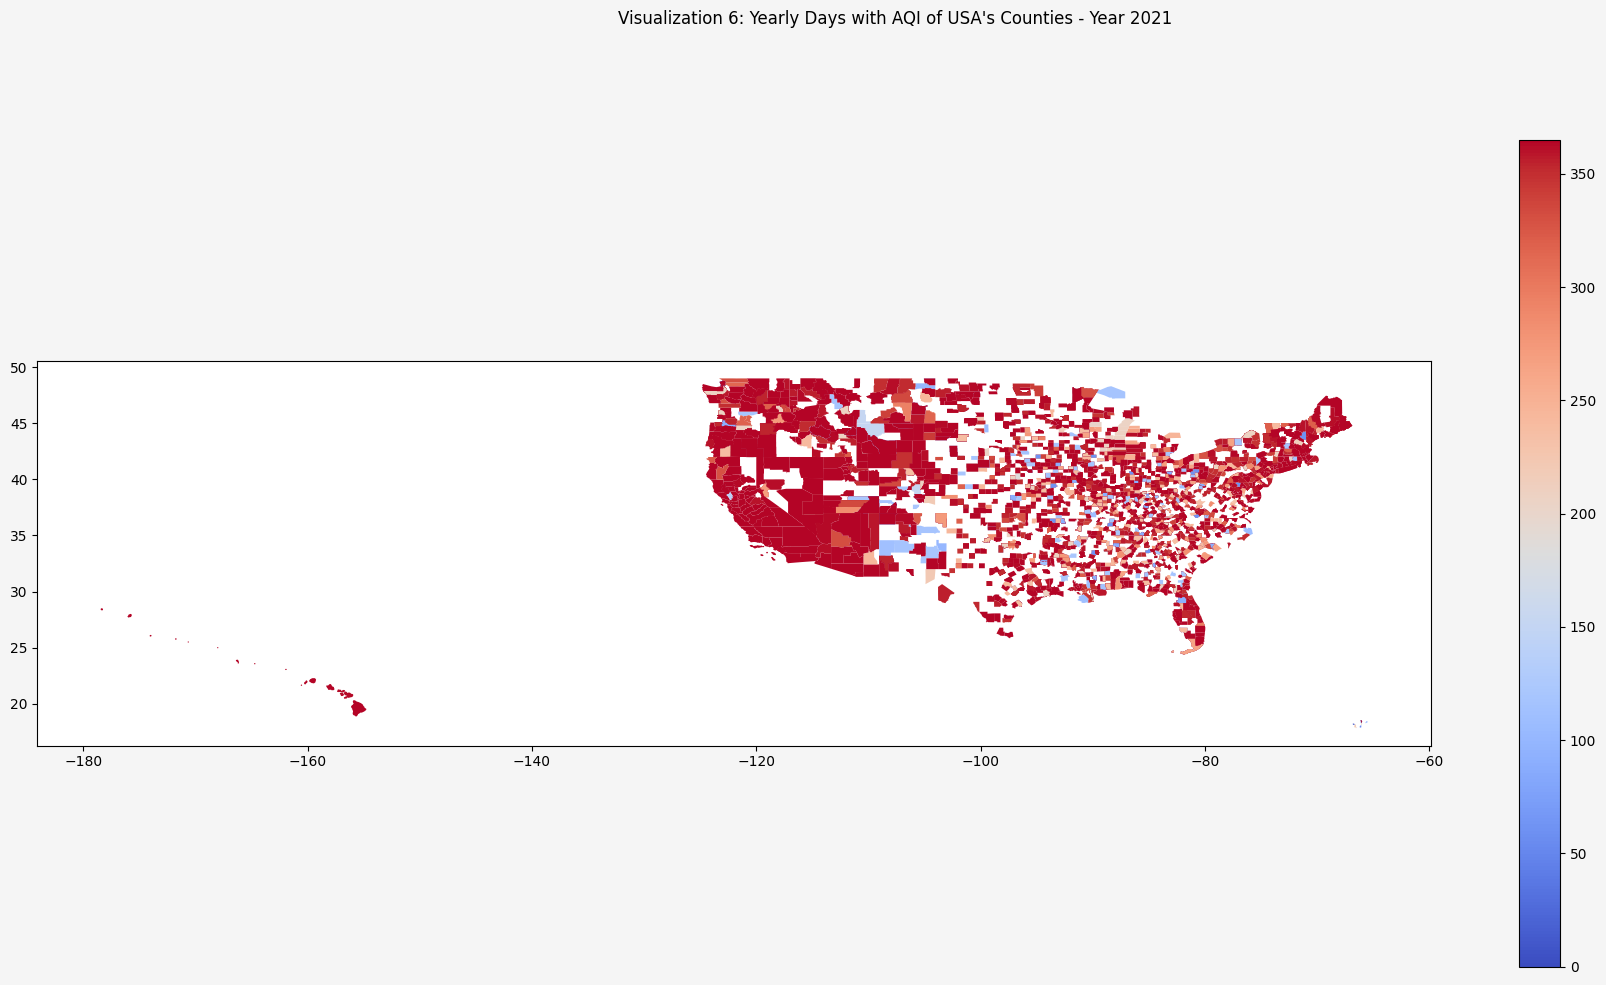

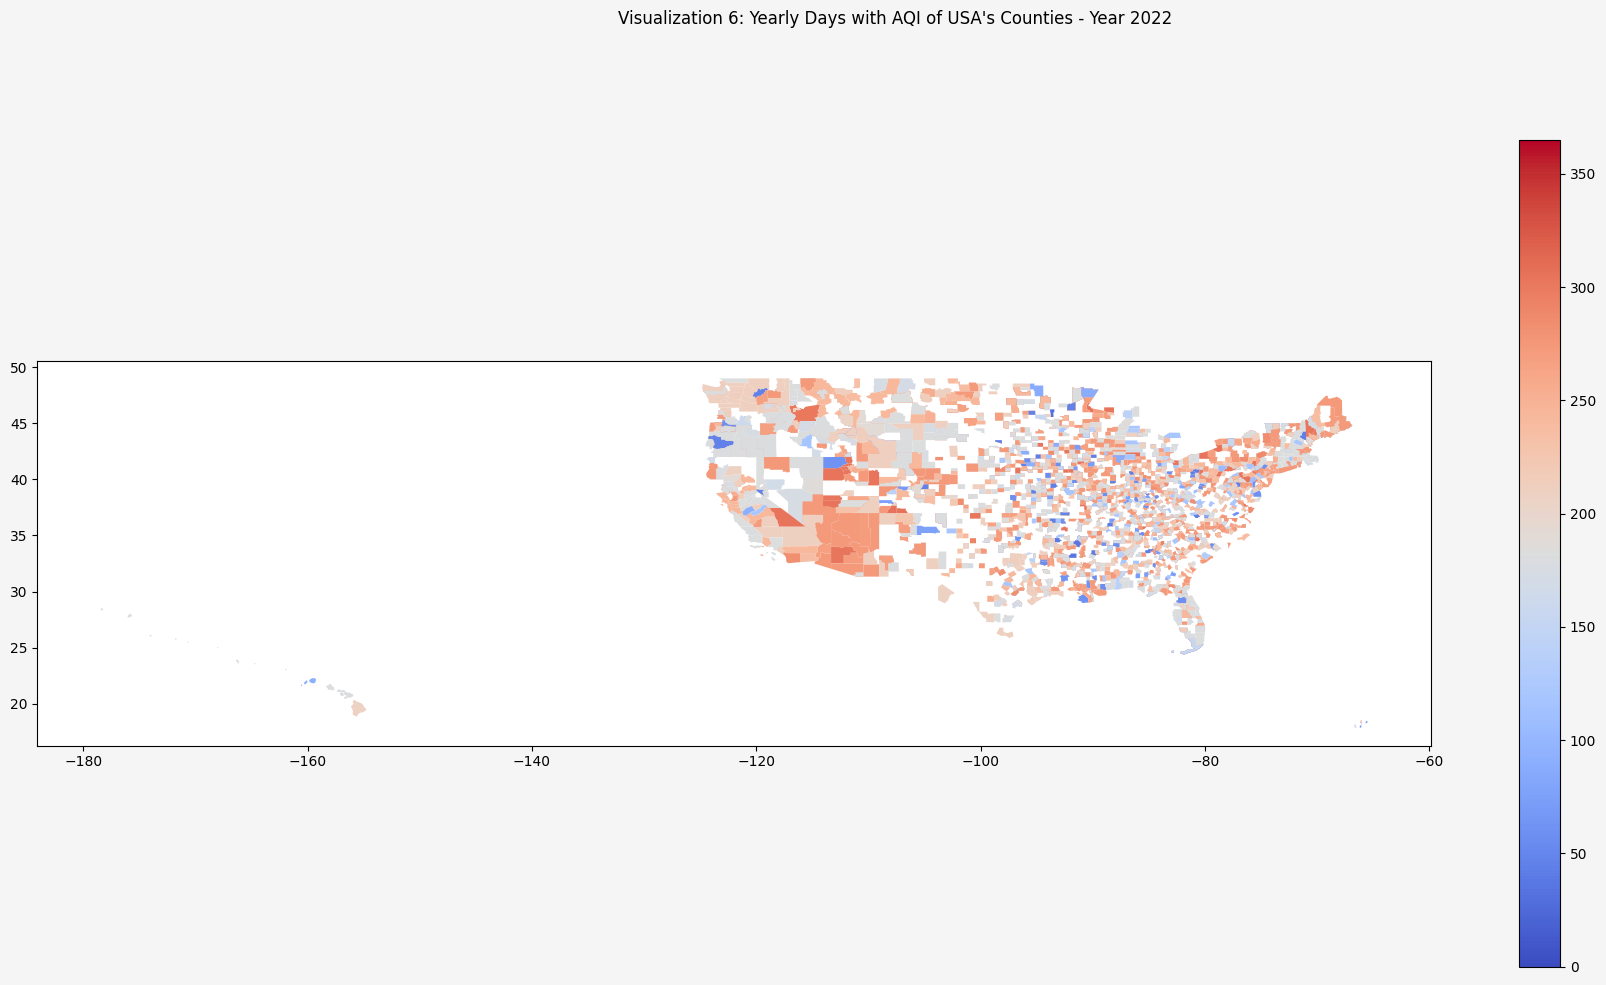

In [60]:
# Colormap for AQI
cmap = "coolwarm"

# Years to plot
years = [2019, 2020, 2021, 2022]

# AQI column to visualize for column Days with AQI
aqi_column = 'Days with AQI'
vmin = 0
vmax = 365 #days

for year in years:
    # Filter data for the current year
    df_year = df_USA_Pol[df_USA_Pol['Year'] == year]

    # Merge the air quality data with the county geometries using the 'County' column
    merged_county1 = df_uscounty_boundary.merge(df_year, on='County')
    fig, ax = plt.subplots(1, figsize=(18, 10), facecolor='whitesmoke')
    fig.suptitle(f"Visualization 6: Yearly Days with AQI of USA's Counties - Year {year}")

    merged_county1.plot(column=aqi_column, cmap=cmap, linewidth=0.8, ax=ax, legend=True, aspect="equal", vmin=vmin, vmax=vmax)

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

In [61]:
# Find the county with the lowest days with AQI
lowest_dayscounty = merged_county[merged_county['Days with AQI'] == merged_county['Days with AQI'].min()]
lowest_dayscounty

geo_point_2d statefp countyfp  \
1097   {'lon': -81.250939242, 'lat': 41.9103521337}      39      085   
1104   {'lon': -87.6311845438, 'lat': 42.325322722}      17      097   
1111  {'lon': -91.4088486044, 'lat': 47.5231709536}      27      075   
1118  {'lon': -114.089374334, 'lat': 47.6459064305}      30      047   
1125  {'lon': -122.753183909, 'lat': 39.0996453445}      06      033   
1132   {'lon': -120.38733759, 'lat': 42.7934613757}      41      037   
1139   {'lon': -97.129376351, 'lat': 44.0220442699}      46      079   
1146   {'lon': -89.493466796, 'lat': 36.3353843636}      47      095   
1153     {'lon': -87.3763856, 'lat': 41.4722121302}      18      089   
1160  {'lon': -106.344837734, 'lat': 39.2023794705}      08      065   
1167  {'lon': -81.7113031676, 'lat': 28.7614688332}      12      069   
1174  {'lon': -85.8016452398, 'lat': 43.9900669341}      26      085   

      countyns  geoid County     namelsad stusab lsad classfp  ...  \
1097  01074055  39085   Lake  Lake County     OH   06      H1  ...   
1104  01784796  17097   Lake  Lake County     IL   06      H1  ...   
1111  00659484  27075   Lake  Lake County     MN   06      H1  ...   
1118  01796943  30047   Lake  Lake County     MT   06      H1  ...   
1125  00277281  06033   Lake  Lake County     CA   06      H1  ...   
1132  01135854  41037   Lake  Lake County     OR   06      H1  ...   
1139  01265776  46079   Lake  Lake County     SD   06      H1  ...   
1146  01639762  47095   Lake  Lake County     TN   06      H1  ...   
1153  00450495  18089   Lake  Lake County     IN   06      H1  ...   
1160  00198149  08065   Lake  Lake County     CO   06      H1  ...   
1167  00308551  12069   Lake  Lake County     FL   06      H1  ...   
1174  01622985  26085   Lake  Lake County     MI   06      H1  ...   

     Hazardous Days Max AQI 90th Percentile AQI Median AQI Days CO  Days NO2  \
1097              0      33                  23         16       0         0   
1104              0      33                  23         16       0         0   
1111              0      33                  23         16       0         0   
1118              0      33                  23         16       0         0   
1125              0      33                  23         16       0         0   
1132              0      33                  23         16       0         0   
1139              0      33                  23         16       0         0   
1146              0      33                  23         16       0         0   
1153              0      33                  23         16       0         0   
1160              0      33                  23         16       0         0   
1167              0      33                  23         16       0         0   
1174              0      33                  23         16       0         0   

      Days Ozone Days PM2.5 Days PM10     State_County  
1097           0         14         1  California_Lake  
1104           0         14         1  California_Lake  
1111           0         14         1  California_Lake  
1118           0         14         1  California_Lake  
1125           0         14         1  California_Lake  
1132           0         14         1  California_Lake  
1139           0         14         1  California_Lake  
1146           0         14         1  California_Lake  
1153           0         14         1  California_Lake  
1160           0         14         1  California_Lake  
1167           0         14         1  California_Lake  
1174           0         14         1  California_Lake  

[12 rows x 40 columns]

In [62]:
# Group the data by 'Year' and 'County' and calculate max and min AQI values
max_County_days = df_USA_Pol[df_USA_Pol['County'] == 'Guayama'].groupby('Year')['Days with AQI'].agg(['max','median','min'])
# Rename the columns for clarity
max_County_days = max_County_days.rename(columns={'max': 'Max AQI','median':'Median AQI', 'min': 'Min AQI'})
# Print the results
print(max_County_days)

      Max AQI  Median AQI  Min AQI
Year                              
2019        2         2.0        2
2020       34        34.0       34
2021       54        54.0       54
2022       55        55.0       55


In [63]:
# Find the county with the highest days with AQI
highest_dayscounty = merged_county[merged_county['Days with AQI'] == merged_county['Days with AQI'].max()]
highest_dayscounty

geo_point_2d statefp countyfp  \
4157  {'lon': -107.048288324, 'lat': 37.1936094363}      08      007   
4176   {'lon': -107.843270687, 'lat': 37.286581954}      08      067   

      countyns  geoid     County          namelsad stusab lsad classfp  ...  \
4157  00198119  08007  Archuleta  Archuleta County     CO   06      H1  ...   
4176  00198148  08067   La Plata   La Plata County     CO   06      H1  ...   

     Hazardous Days Max AQI 90th Percentile AQI Median AQI Days CO  Days NO2  \
4157              0     227                  58         44       0         2   
4176              0     108                  74         47       0         0   

      Days Ozone Days PM2.5 Days PM10        State_County  
4157         271          0        33  Colorado_Archuleta  
4176         298          8         0   Colorado_La Plata  

[2 rows x 40 columns]

**Notably, the maps reveal a substantial improvement in air quality in 2022 noticabilty ranging from 200 to 300, with the other three years displaying above 300 range and have comparatively less changes.The max Days with AQI for county showed 1614 rows that many counties had maximum range for three years 2019-2020,2021.*

#Visualization 7: USA Counties Days CO

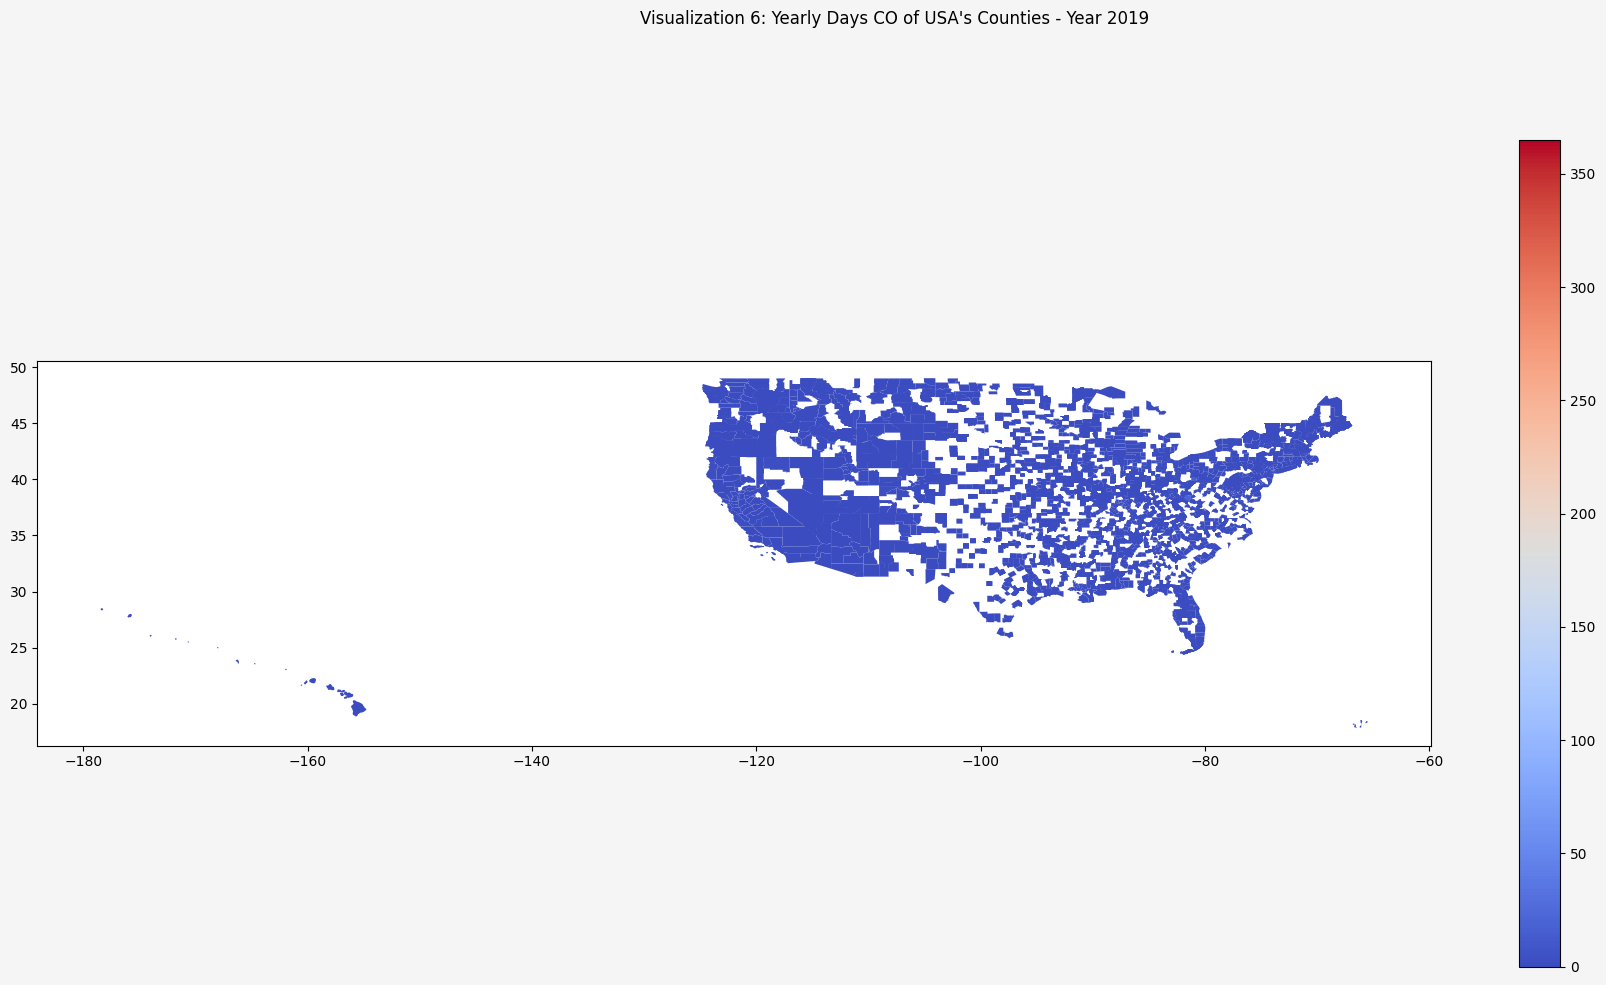

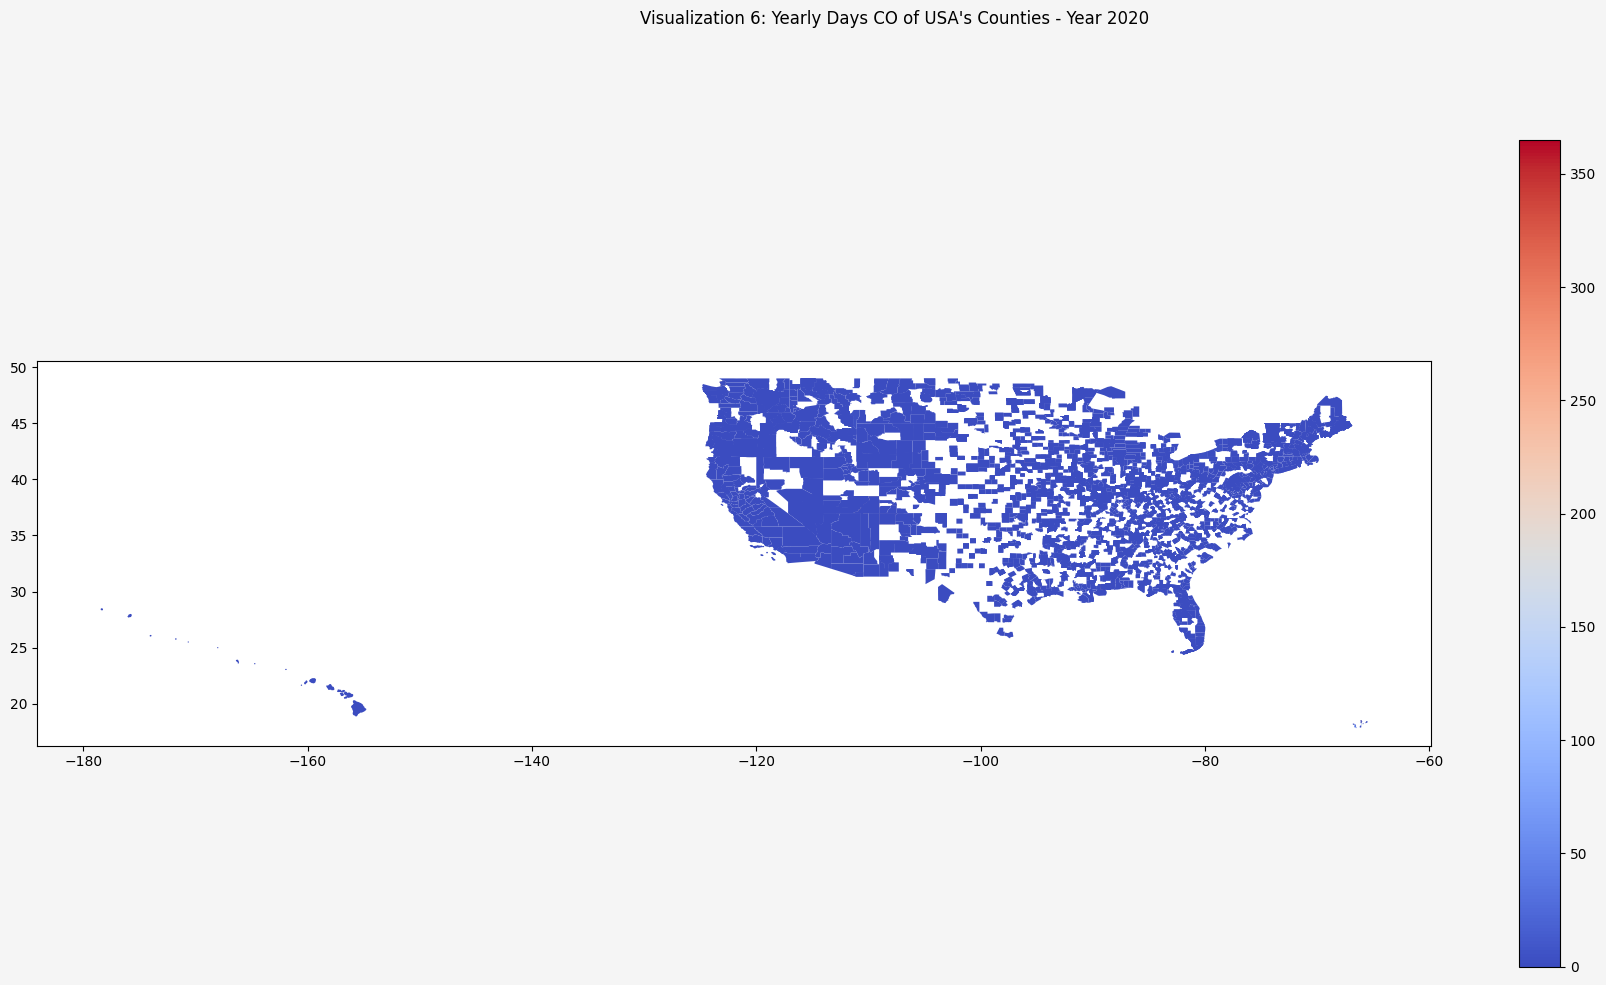

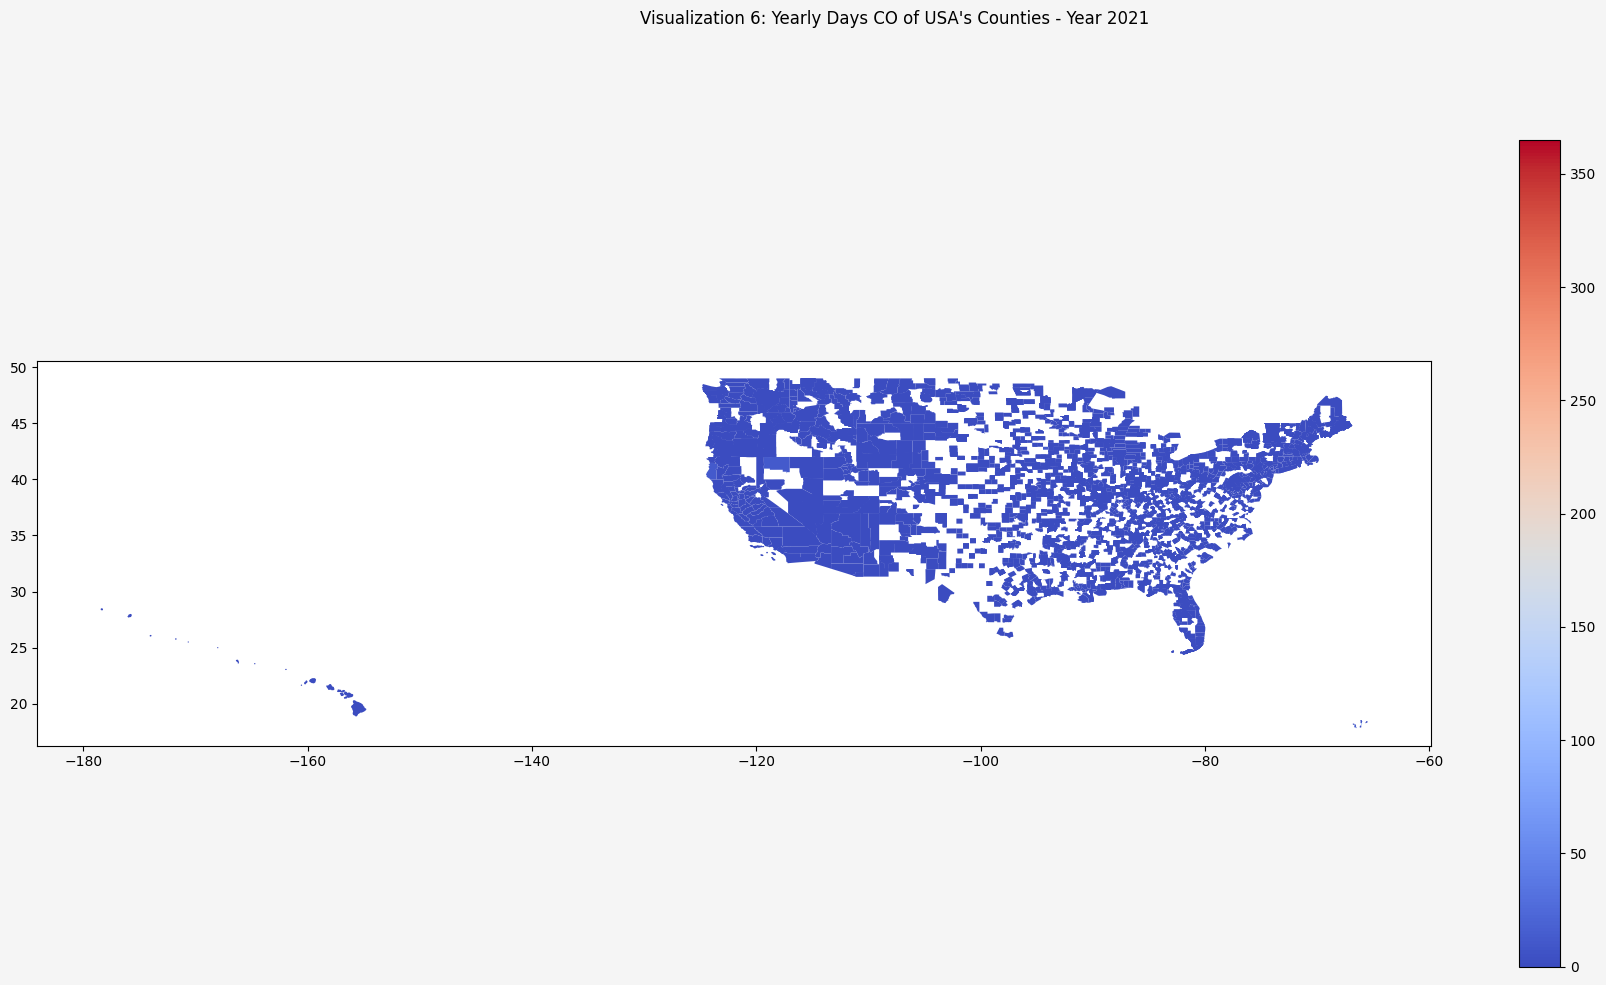

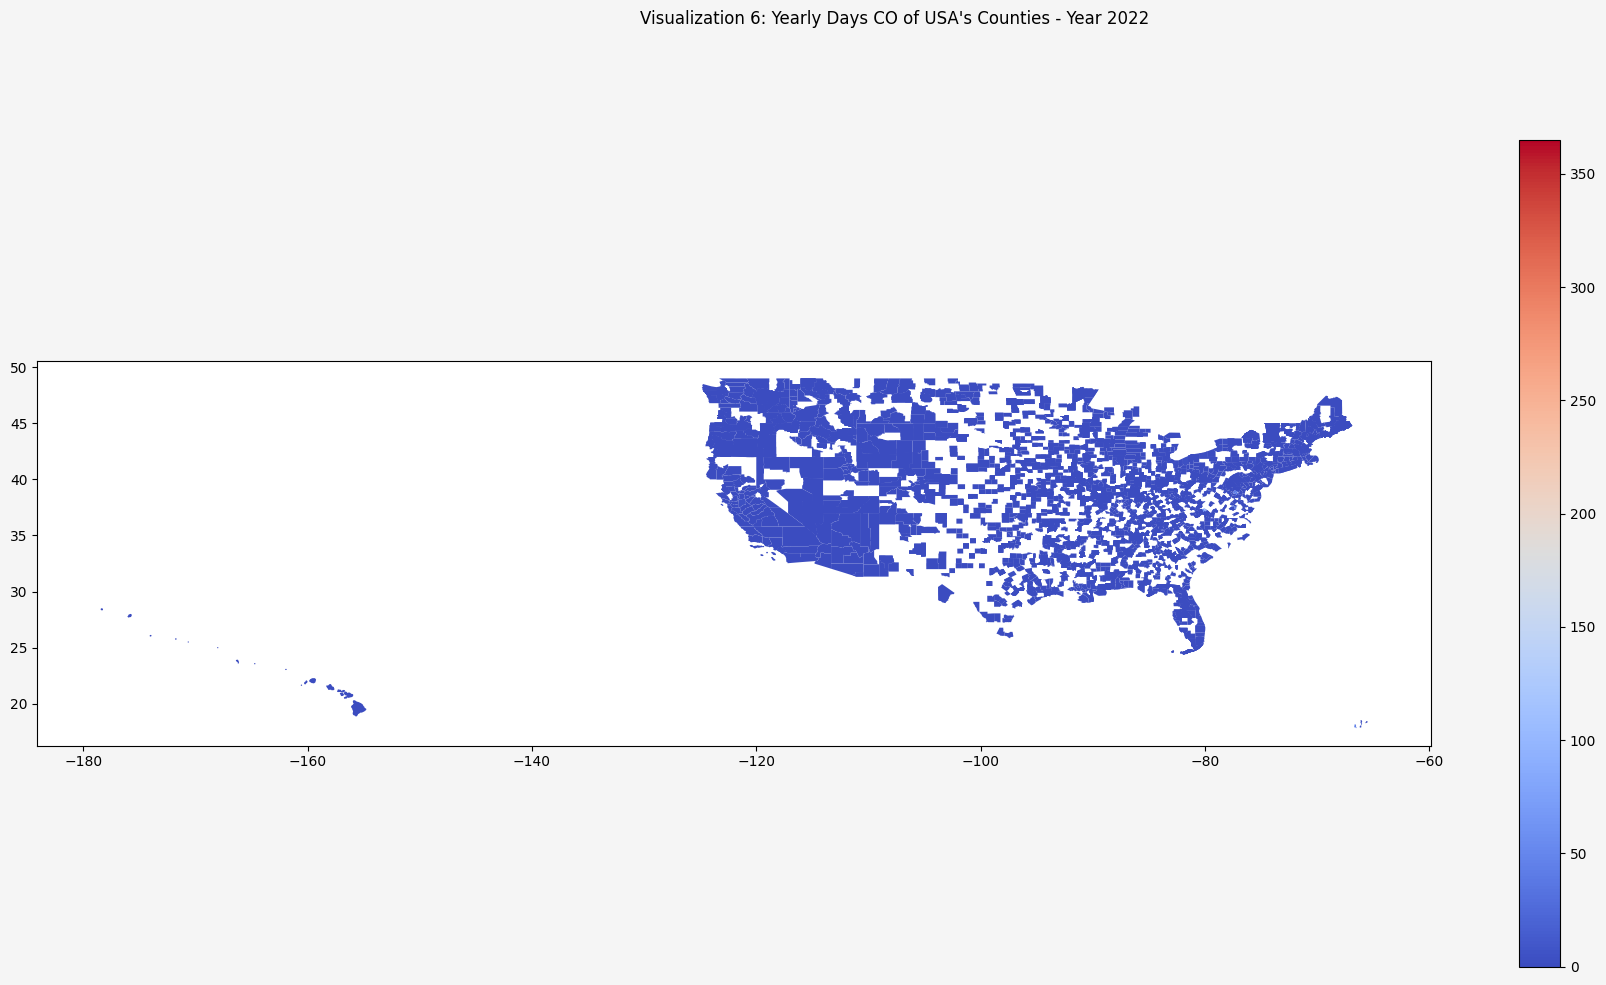

In [64]:
# Colormap for AQI
cmap = "coolwarm"

# Years to plot
years = [2019, 2020, 2021, 2022]

# AQI column to visualize for column Days with AQI
aqi_column = 'Days CO'
vmin = 0
vmax = 365 #days

for year in years:
    # Filter data for the current year
    df_year = df_USA_Pol[df_USA_Pol['Year'] == year]

    # Merge the air quality data with the county geometries using the 'County' column
    merged_county1 = df_uscounty_boundary.merge(df_year, on='County')
    fig, ax = plt.subplots(1, figsize=(18, 10), facecolor='whitesmoke')
    fig.suptitle(f"Visualization 6: Yearly Days CO of USA's Counties - Year {year}")


    merged_county1.plot(column=aqi_column, cmap=cmap, linewidth=0.8, ax=ax, legend=True, aspect="equal", vmin=vmin, vmax=vmax)

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

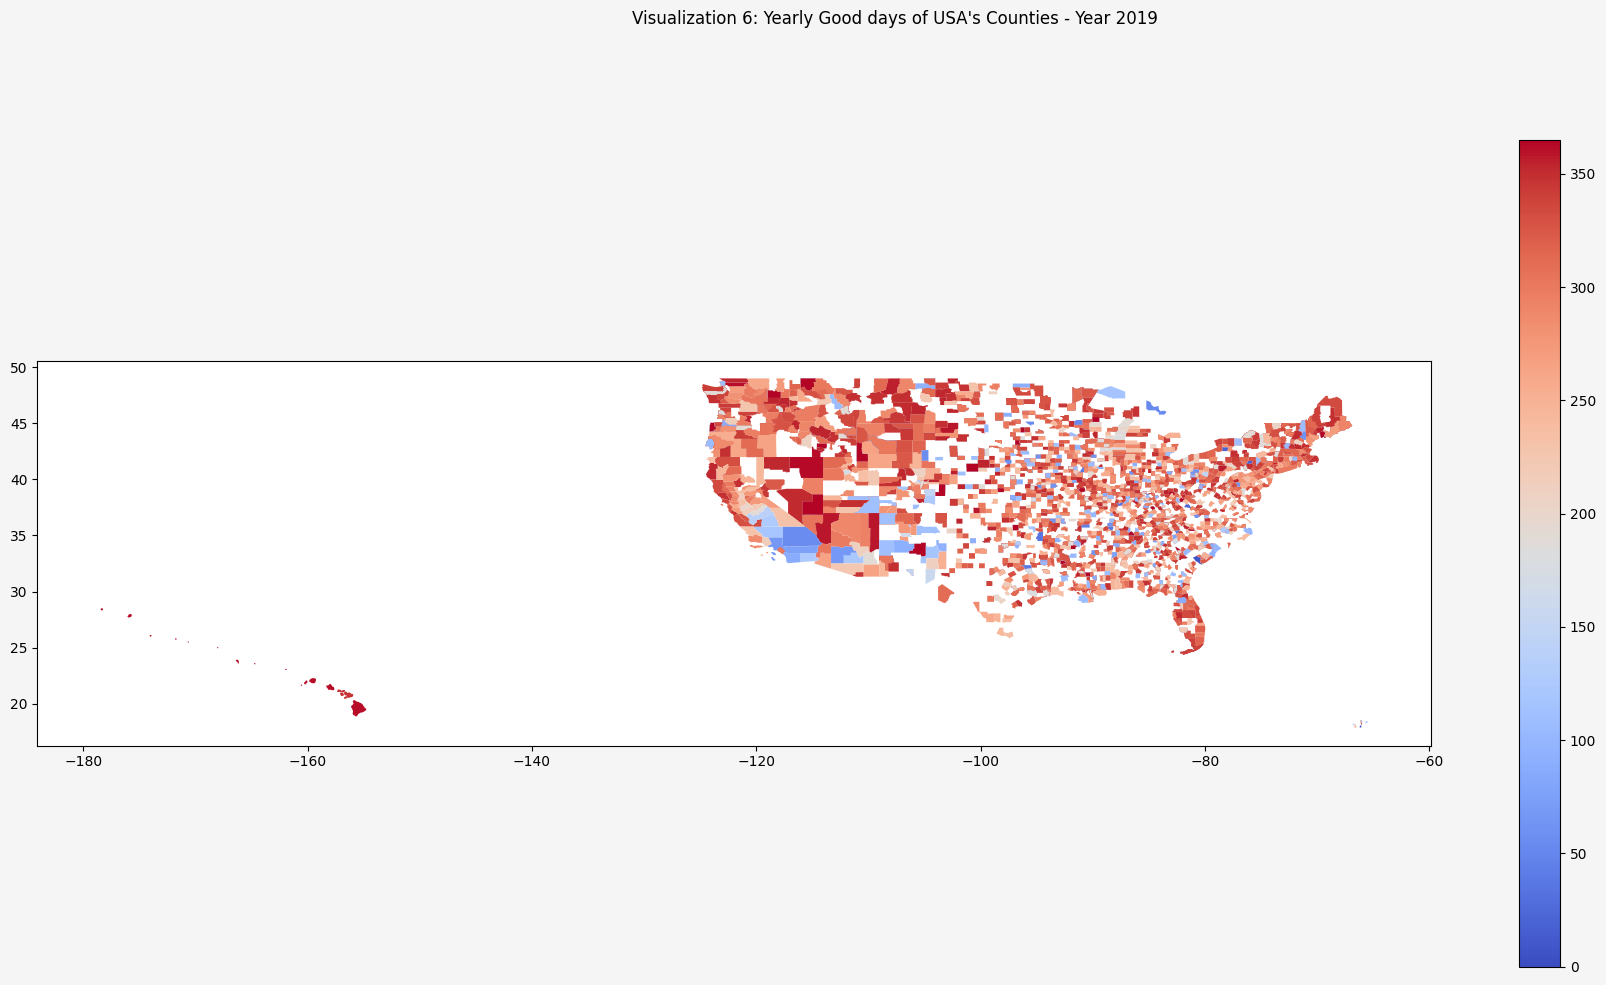

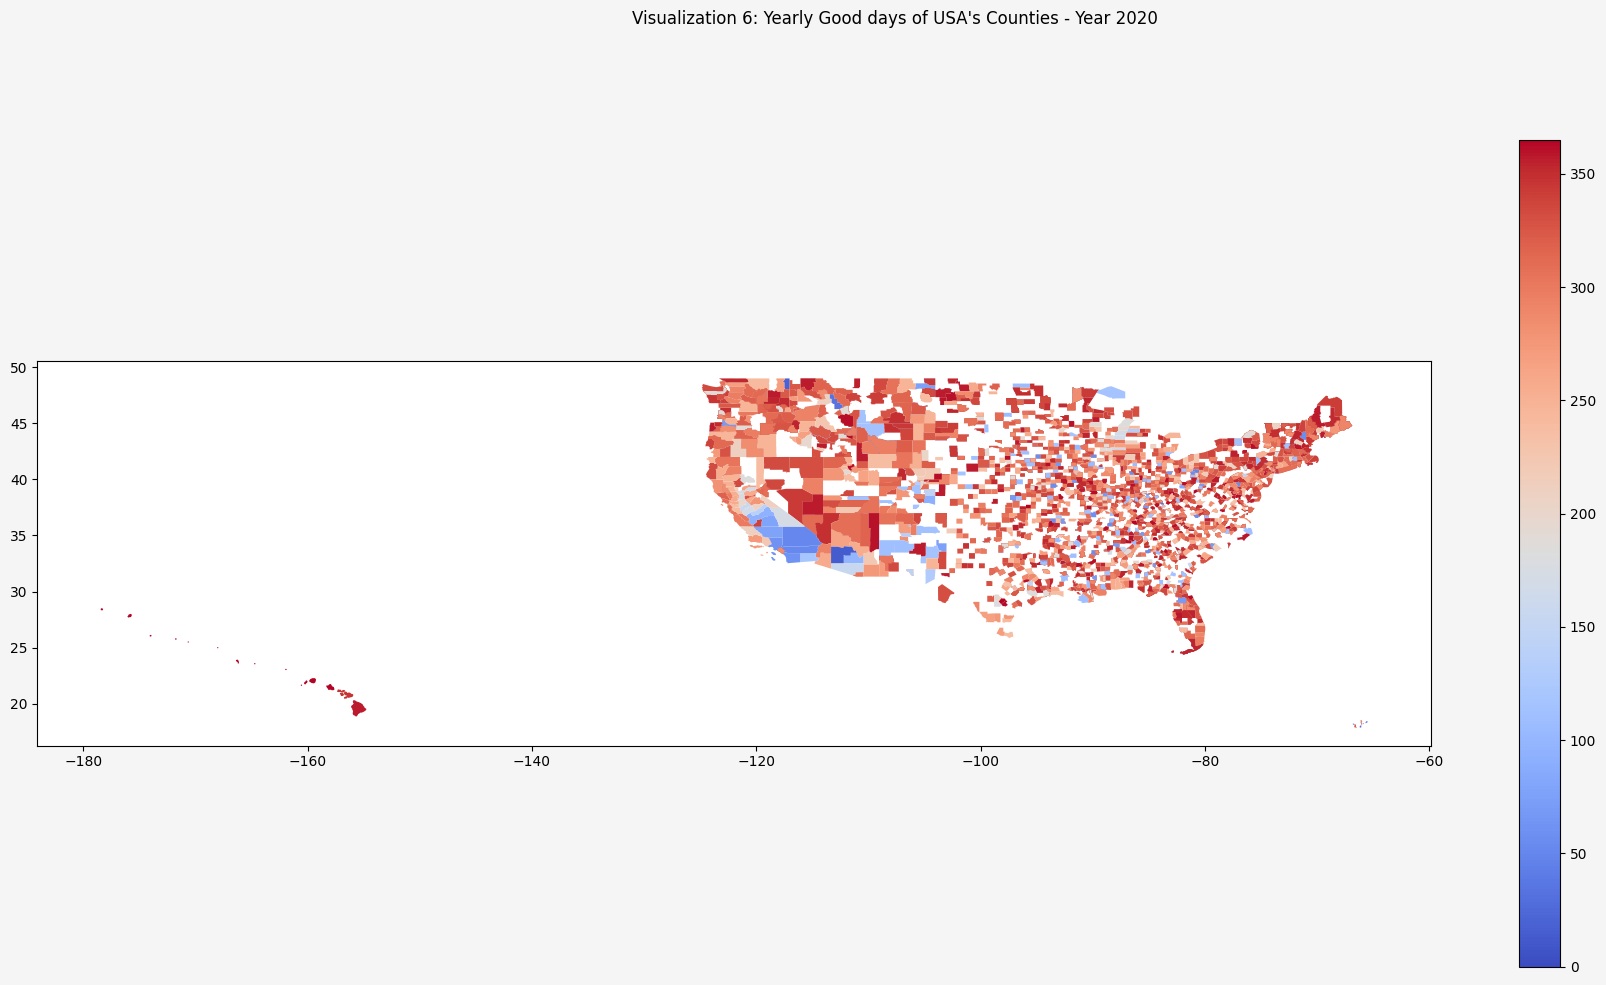

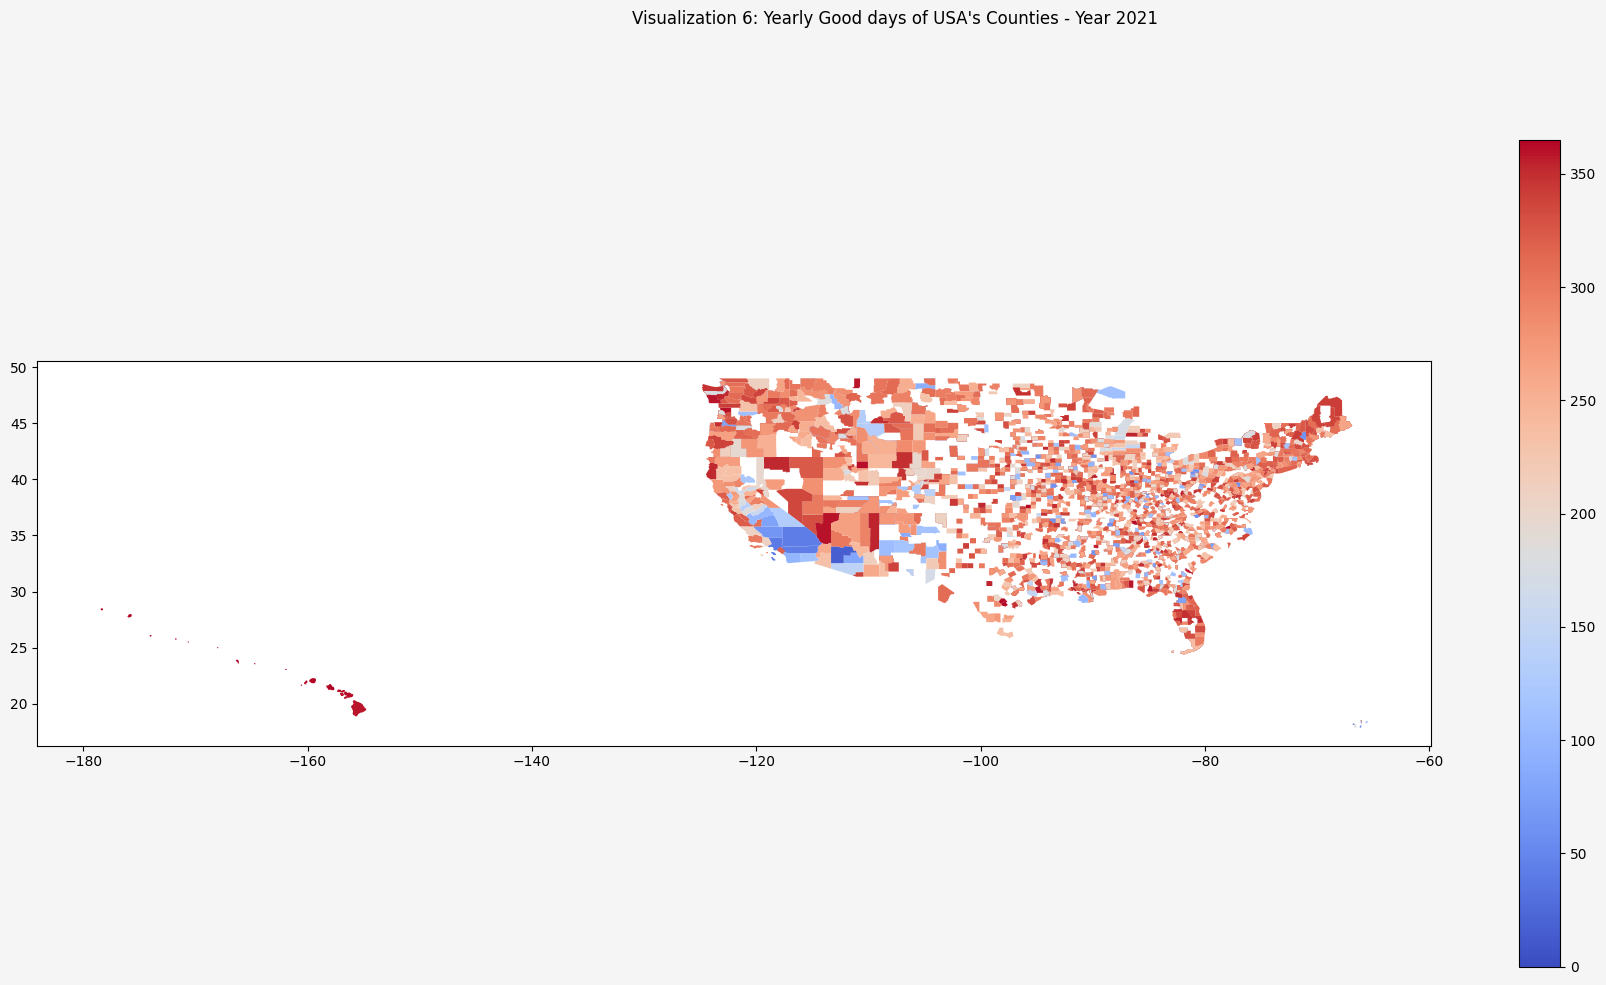

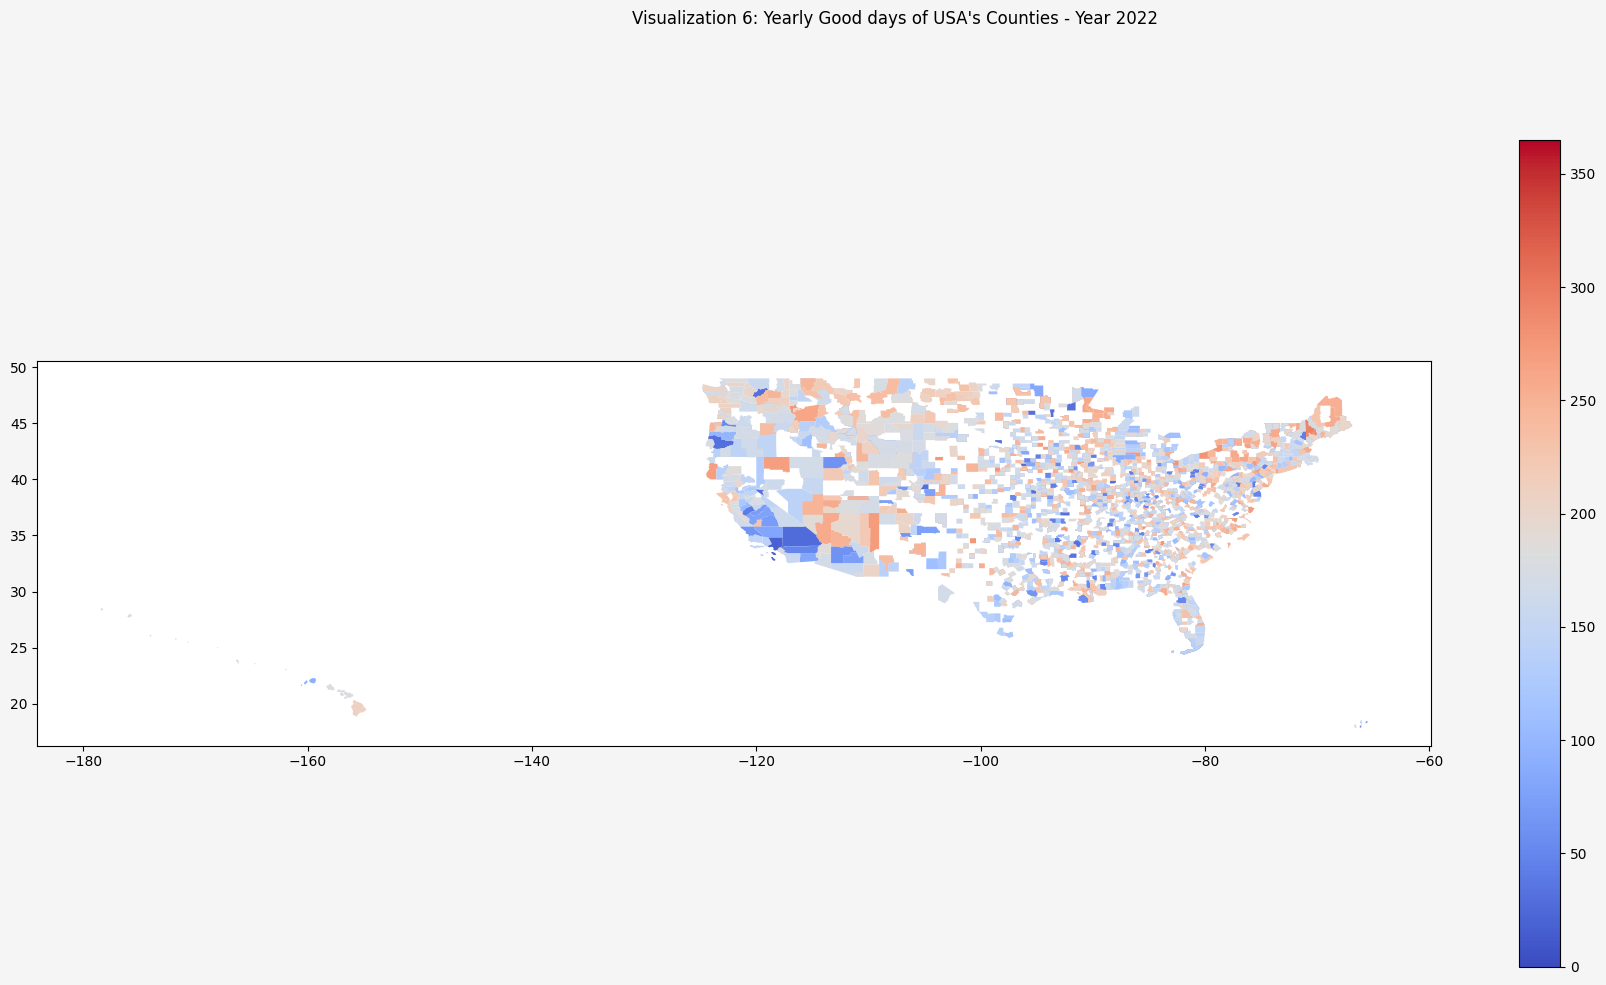

In [65]:
# Colormap for AQI
cmap = "coolwarm"

# Years to plot
years = [2019, 2020, 2021, 2022]

# AQI column to visualize for column Days with AQI
aqi_column = 'Good Days'
vmin = 0
vmax = 365 #days

for year in years:
    # Filter data for the current year
    df_year = df_USA_Pol[df_USA_Pol['Year'] == year]

    # Merge the air quality data with the county geometries using the 'County' column
    merged_county1 = df_uscounty_boundary.merge(df_year, on='County')
    fig, ax = plt.subplots(1, figsize=(18, 10), facecolor='whitesmoke')
    fig.suptitle(f"Visualization 6: Yearly Good days of USA's Counties - Year {year}")


    merged_county1.plot(column=aqi_column, cmap=cmap, linewidth=0.8, ax=ax, legend=True, aspect="equal", vmin=vmin, vmax=vmax)

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

*As per the above analysis of air pollution data Days CO2 and Good Days which was obtained by merging the county-level air quality data with the corresponding county geometries shows much similarities for three respective years than 2022 due to missing data in county dataset.The similar approaches can be conducted to other features like NO2, PM2.5 and PM 10 and see the differences.*

**Project Summary:**
The Project unveils trends and fluctuations over multiple years in country, state and county level, providing valuable insights using geospatial analysis. The gathered insights about air quality challenges can be useful to be aware and also for informed decision-making.




